In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()

In [2]:
# Read loan.csv data into a dataframe
loan_df = pd.read_csv('loan.csv', sep=',', error_bad_lines=False, index_col=False) #, dtype='unicode')

/Users/ragesh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Helper Methods

In [3]:
# This custom function will plot the box,bar or scatter plot and will configure plot attributes as per parameters defined
# This will allow uniformity of design as well as reduce the repetition of similar code
# define plotfigure=False if using with sub plots

def plot_box_or_bar_plot(data, x, y, hue='', xlabel='', ylabel='', title='', xticks=[], yticks=[], 
                  plotfigure=True, xroataion = 0, yrotation = 0, 
                  figsize=(10,8), ylog=False, xlog=False, plot=0, 
                  ticksFont_size=12, labelsFont_size=14,
                  legend_label=[], legend_loc='upper right', 
                  legend_font=14,
                  have_legend=False,
                  legedTitle='',
                  bbox_to_anchor = (1.35, 0.85),
                  annotate = True,
                  annoteSize=12):
    
    if plotfigure :
        _ = plt.figure(figsize=figsize)
        
    # plot with hue if provided
    if len(hue) > 0 :   
        if plot == 0 :
            _ = sns.boxplot(data=data, x=x, y=y,hue=hue, palette='cool_r')
        elif plot == 1:
            splot = sns.barplot(data=data, x=x, y=y,hue=hue, palette='cool_r')
        else:
            _ = sns.scatterplot(data=data, x=x, y=y,hue=hue, palette='cool_r')
    else : 
        if plot == 0 :
            _ = sns.boxplot(data=data, x=x, y=y, palette='cool_r')
        elif plot == 1: 
            splot = sns.barplot(data=data, x=x, y=y, palette='cool_r')
        else:
            _ = sns.scatterplot(data=data, x=x, y=y, palette='cool_r')
    
    # Adding title to the plot
    if len(title) > 0:
        _ = plt.title(title,fontsize=14, color='#660055', pad=2)
        
    # Adding labels to the plot
    if len(ylabel) > 0 :     
        _ = plt.ylabel(ylabel,fontsize=labelsFont_size, color='#550055')
    if len(xlabel) > 0 : 
        _ = plt.xlabel(xlabel,fontsize=labelsFont_size, color='#550055')
   
    # Plot on log scale
    if ylog:
        _ = plt.yscale('log')
    if xlog:
        _ = plt.xscale('log') 
        
        
    # Adding ticks
    if len(xticks) == 2:
        _ = plt.xticks(xticks[0],xticks[1], size=ticksFont_size, rotation=xroataion, color='#124788')
    else :
        _ = plt.xticks(size=ticksFont_size, rotation=xroataion, color='#124788')
    if len(yticks) == 2:
        _ = plt.yticks(yticks[0],yticks[1], size=ticksFont_size, rotation=yrotation, color='#124788')
    else :
        _ = plt.yticks(size=ticksFont_size, rotation=yrotation, color='#124788')
        
    # Configure legends    
    if have_legend :
        if len(legend_label) > 0:    
            _ = plt.legend(labels=legend_label,title=legedTitle, loc=legend_loc, fontsize=legend_font, bbox_to_anchor= bbox_to_anchor)
        else :
            _ = plt.legend(title=legedTitle, loc=legend_loc, fontsize=legend_font, bbox_to_anchor=bbox_to_anchor)
            
    # Annotate the y-axis value count on top of each bar in case of bar plot
    if plot==1 & annotate: 
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), color='#124799',fontSize=annoteSize, ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [4]:
# This custom function will plot the dist plot and will configure plot attributes as per parameters defined
# This will allow uniformity of design as well as reduce the repetition of similar code
# define plotfigure=False if using with sub plots

def plot_dist_plot(series,kde=True,
                   rug=False,
                   hist=True,
                   plotfigure=True,
                   bins=30, 
                   figsize=(15,6), 
                   xlabel='', 
                   ylabel='', 
                   title='',
                   labelsFont_size=14,
                   titleFont_size=14,
                   ticksFont_size=12):
    
    if plotfigure :
        _ = plt.figure(figsize=figsize)
    
    _ = sns.distplot(series,hist=hist,kde=kde,rug=rug,bins=bins)
 
    if len(title) > 0:
        _ = plt.title(title,fontsize=titleFont_size, color='#660055', pad=2)
        
    if len(ylabel) > 0 :     
        _ = plt.ylabel(ylabel,fontsize=labelsFont_size, color='#550055')
    if len(xlabel) > 0 : 
        _ = plt.xlabel(xlabel,fontsize=labelsFont_size, color='#550055')
        
    _ = plt.xticks(size=ticksFont_size, color='#124788')
    _ = plt.yticks(size=ticksFont_size, color='#124788')

In [5]:
# This custom function will plot the FacetGrid plot and will configure plot attributes as per parameters defined
# This will allow uniformity of design as well as reduce the repetition of similar code

def plot_facet_bar_plot(df,
                        col,
                        x,
                        y,
                        hue='',
                        palette='cool_r',
                        labels=[],
                        xticks=[], 
                        yticks=[],
                        margin_tiles=True, 
                        height=5, 
                        aspect=1, 
                        col_wrap=2,
                        have_legend=False,
                        edgecolor = 'white',
                        legend_title='',
                        lw=.5,
                        alpha=.5,
                        color="#334488",
                        wspace=.02,
                        hspace=.02):
    if len(hue)>0:
        g =sns.FacetGrid(df, 
                         col=col,
                         hue=hue,
                         height=height,
                         aspect=aspect, 
                         palette = palette) 
        
        g.map(plt.bar,x,y,edgecolor=edgecolor, lw=lw, alpha=alpha)

    else:
        g =sns.FacetGrid(df, 
                         col=col,
                         height=height,
                         margin_titles=margin_tiles, 
                         aspect=aspect, 
                         col_wrap=col_wrap) 
        
        g.map(plt.bar,x,y,color=color, edgecolor=edgecolor, lw=lw, alpha=alpha)

    
    if have_legend :
        g.add_legend(title=legend_title)
        
    if len(labels) > 0 :
        g.set_axis_labels(labels[0],labels[1]);

    if len(yticks) > 0 :
        g.set(yticks=yticks);
        
    if len(xticks) > 0 :
        g.set(xticks=xticks);
    
    g.fig.subplots_adjust(wspace=wspace, hspace=hspace);

In [6]:
# This custom function will help to extract the frequency distribution of a single normalized dataframe column in a df
def get_frequency_distribution(df, colName):
    frequency_dist = round( 100 * df[colName].value_counts(True),2)
    frequency_dist = frequency_dist.to_frame('normalized_frequency_distribution').reset_index()
    frequency_dist = frequency_dist.rename(columns = {'index':colName})
    return frequency_dist

In [7]:
# This custom function will help to extract the frequency distribution of a single normalized dataframe column
# based on a groupby clause of another column of the dataframe
# Param :- df - Pass the dataframe
# Param :- groupColArr - Array of columns based on which groupby clause is performed
# Param :- colName - column name based on which frequency distribution has to be done
def get_group_frequency_dist(df, groupColArr, colName):
    group_frequency_dist_group = round(100 * df.groupby(groupColArr)[colName].value_counts(normalize=True),2)
    group_frequency_dist_df = group_frequency_dist_group.to_frame('normalized_frequency_distribution').reset_index()
    return group_frequency_dist_df

In [8]:
# <info> Method to get basic details about the dataset.</info>
# <parameter> df - Pass the dataframe.</paramtere>
# <return>Print the basic details such as shape, size, columns, data type etc.</return>
def get_basic_details(df):
    print("Shape of dataset")
    print(df.shape)
    print("\nNumber of Observations in dataset")
    print(df.size)
    print("\nBasic Info")
    print(df.info())
    print("\nColumn names")
    print(df.columns)
    print("\ndata types frequency")
    print(df.dtypes.value_counts())
    print("\nTop 3 Columns having largest number of missing values")
    print(df.isnull().sum().nlargest(3))
    print("\nTop 3 Rows having largest number of missing values")
    print(df.isnull().sum(axis=1).nlargest(3))
    print("\nNumber of total missing data in dataframe")
    print(df.isnull().sum().sum())

In [9]:
# This method will print the summary statistics for the dataframe
# This will handle the dataframe which have too many variables like we have 111 in loan dataset
# Param :- df - Pass the dataframe
def get_summary_statistics(df):
    print("\n Summary Statistics \n") 
    startIndex = 0
    while(startIndex < len(df.columns)) :
        lower = startIndex
        upper = startIndex + 4
        if (upper < len(df.columns)):   
            print('\n{0}'.format(df.iloc[:, lower:upper].describe()))
        else:
            print('\n{0}'.format(df.iloc[:, lower:].describe()))
        startIndex = upper
    

##### Exploring  basic details about the Dataset
Get the basic  and summary statistics details about the loan dataset such as - shape, size, columns, datatypes frequency, total missing values e.t.c. 

In [10]:
# We have 39717 rows and 111 columns
# We can see that few columns are having no observations at all
# There are total 2263364 misisng data in loan dataset
get_basic_details(loan_df)

Shape of dataset
(39717, 111)

Number of Observations in dataset
4408587

Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None

Column names
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

data types frequency
float64    74
object     24
int64      13
dtype: int64

Top 3 Columns having largest number of missing values
mths_since_last_major_derog    39717
annual_inc_joint               39717
dti_joint                      39717
dtype: int64

Top 3 Rows having larges

In [11]:
# Get the summary statistics of the loan dataset.
get_summary_statistics(loan_df)


 Summary Statistics 


                 id     member_id     loan_amnt   funded_amnt
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670
min    5.473400e+04  7.069900e+04    500.000000    500.000000
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000

       funded_amnt_inv   installment
count     39717.000000  39717.000000
mean      10397.448868    324.561922
std        7128.450439    208.874874
min           0.000000     15.690000
25%        5000.000000    167.020000
50%        8975.000000    280.220000
75%       14400.000000    430.780000
max       35000.000000   1305.190000

        grade sub_grade emp_title emp_length
count   39717     39717     37258     


       bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt
count             0.0      0.0                   39661.0      39717.0
mean              NaN      NaN                       0.0          0.0
std               NaN      NaN                       0.0          0.0
min               NaN      NaN                       0.0          0.0
25%               NaN      NaN                       0.0          0.0
50%               NaN      NaN                       0.0          0.0
75%               NaN      NaN                       0.0          0.0
max               NaN      NaN                       0.0          0.0

       mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
count                 0.0                   0.0                    0.0   
mean                  NaN                   NaN                    NaN   
std                   NaN                   NaN                    NaN   
min                   NaN                   NaN                    NaN  

## Data Cleaning

From Summary statistics and basic info we observed that there are few columns which don't have any observations at all, in this section we will try to prepare our dataset so that it could be useful for our analysis.

In [12]:
# <info> Compute the missing value count and misisng % for each variables.</info>
# <parameter> df - Pass the dataframe. </parameter>
# <returns> return the missing values & % of misisng values for all the columns in the dataframe.</returns>
def missing_values_table_columnwise(df):
        # Get Total missing values
        mis_val = df.isnull().sum()
        
        if(mis_val.sum() == 0):
            return 'All good, no missing data found in any column.'
        if(mis_val.all()):
            return 'There are no observations at all.'
        
        # Calculate Percentage of missing values
        mis_val_percent = round(100 * df.isnull().sum() / len(df.index),2)
        
        # Create a table with the results from mis_val and mis_val_percent
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table = mis_val_table.rename(
        columns = {0 : 'missing_val_count', 1 : 'percent'})
        
       # Sort the table by percentage of missing descending
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        'percent', ascending=False)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")
                
        # Return the dataframe with missing information
        return mis_val_table

In [13]:
# Get the missing values count and percent per column using missing_values_table_columnwise() user defined function
# We can observe that there are good number of columns which have no observations at all - 100% mising values
# Such columns which have no data at all or have very high misisng value % are of no use and will create noise
# So it's better to remove such columns
missing_values_df = missing_values_table_columnwise(loan_df)
missing_values_df.head(20)

Your selected dataframe has 111 columns.
There are 68 columns that have missing values.


,missing_val_count,percent
bc_open_to_buy,39717,100.0
acc_open_past_24mths,39717,100.0
bc_util,39717,100.0
mo_sin_old_il_acct,39717,100.0
mo_sin_old_rev_tl_op,39717,100.0
mo_sin_rcnt_rev_tl_op,39717,100.0
mo_sin_rcnt_tl,39717,100.0
mort_acc,39717,100.0
mths_since_recent_bc,39717,100.0
mths_since_recent_bc_dlq,39717,100.0


In [14]:
# Check frequency distribution of missing value % across all columns
# We have 54 columns which have no observation or 100% misisng values present - these have 0% contribution
# Also there are 3 columns which have aprox 93, 65 and 97 % misisng data 
# These columns too will not contribute much in our analysis due to very low volume of data
missing_values_df.iloc[:,1].value_counts()

100.00    54
0.14       2
32.58      1
0.03       1
0.18       1
0.10       1
0.13       1
2.71       1
92.99      1
64.66      1
97.13      1
0.01       1
6.19       1
1.75       1
Name: percent, dtype: int64

This distribution shows that 54 columns exists where 100% rows are NaNs, so get rid of these redundant columns and get a reduced dataframe

In [15]:
# This function will return the list of columns having misisng value % greater than or equal to thresh limit
# Param1 :- df - pass the dataframe
# Param2 :- thresh - Pass the misisng value % limit
# param3 :- drop - Pass True if you want to drop the columns which have more misisng value % than thresh, default is False
def get_drop_columns_with_excessive_missing_value_percent(df, thresh, drop=False):
    print('Shape of dataframe columns{0}'.format(df.shape))
    
    # don't change passed dataframe
    df_new = df.copy()
    
    misisng_columns=[]
    
    columns_with_nan = df_new.columns[df_new.isnull().any()]
    
    for column in columns_with_nan:
        if 100 * df_new[column].isnull().sum() / len(df_new.index) >= thresh:
            misisng_columns.append(column)
            if drop == True:
                df_new.drop(column,1, inplace=True)
    if drop == True:
        print('Dropped {0} columns'.format(len(misisng_columns)))
        print('Shape of dataframe after droping columns{0}'.format(df_new.shape))
        return df_new
    else:
        return misisng_columns 
    
        

In [16]:
# Call drop_columns_with_excessive_missing_value_percent() method passing dataframe,
# thresh and drop=True as we want to drop such columns
# thresh=90 will drop those columns which have more than 90% of misisng values in it
loan_df = get_drop_columns_with_excessive_missing_value_percent(loan_df,63,True)

Shape of dataframe columns(39717, 111)
Dropped 57 columns
Shape of dataframe after droping columns(39717, 54)


In [17]:
# Again analyze reduced loan_df using missing_values_table_columnwise utility
# Now we observe that only 11 columns have missing values that too their percentage is quite less, 
# so to cleanup data further we would like to understand each column better with data understanding
missing_values_table_columnwise(loan_df)

Your selected dataframe has 54 columns.
There are 11 columns that have missing values.


,missing_val_count,percent
desc,12940,32.58
emp_title,2459,6.19
emp_length,1075,2.71
pub_rec_bankruptcies,697,1.75
last_pymnt_d,71,0.18
collections_12_mths_ex_med,56,0.14
chargeoff_within_12_mths,56,0.14
revol_util,50,0.13
tax_liens,39,0.10
title,11,0.03


##### Rowise missing % might also be crucial if some of the rows have most of the observations missing from it, let's perform rowise missing value analysis too.

In [18]:
# This method will get or drop the rows which have misisng values % >= thresh
# Param :- df - dataframe
# thresh :- upper limit for misisng value %
# drop : if True then the rows will be dropped from the dataframe which crosses the upper thresh limit - default : False
def get_and_drop_rows_with_excessive_missing_value_percent(df, thresh, drop=False):
    print('Shape of dataframe before: {0}'.format(df.shape))
    misisng_index=[]
    index_with_nan = df.index[df.isnull().any(axis=1)]
    for index in index_with_nan:
        if 100*df.iloc[index].isnull().sum()/len(df.columns) >= thresh:
            misisng_index.append(index)
            if drop == True:
                df.drop(index,0, inplace=True)
    print('Shape of dataframe after: {0}'.format(df.shape))
    return misisng_index 

In [19]:
# Let's use get_and_drop_rows_with_excessive_missing_value_percent() funcion to detect and drop indexes which have higher number
# of misisng values than the upper limit set by thresh
# First let check with 50% thresh to see how many rows are there which have more than 50% of the observation missing from it
# We don't have any rows which have 50 or more than 50% of missing data, so we are good with rows
get_and_drop_rows_with_excessive_missing_value_percent(loan_df,50)

Shape of dataframe before: (39717, 54)
Shape of dataframe after: (39717, 54)


[]

#### Drop columns having all same or all different values in it : Let's check if we have any column which contains all similar or all different values in all the rows or in other terms if all the observations for any column is same, in such case the unique count will be 1 and for all different value unique count will be equal to total number of rows or index.

In [20]:
# This method will get or drop the columns which have only 1 unique values in it, t'e values in all rows are same
# Param1:- df - pass the dataframe
# Param2:- drop - True if need to drop such column, default is False
# Returns modified dataframe if drop is True else return column list
def get_drop_column_having_one_unique_value(df, drop=False):
    print('Shape of dataframe {0}'.format(df.shape))
    
    # don't modify passed dataframe
    df_new = df.copy() 
    col_with_signle_unique_val_mask = df_new.columns[df_new.nunique() == 1]
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
           "There are " + str(len(col_with_signle_unique_val_mask)) + " columns that have only ONE distinct value in all the rows.")

    if drop==True:
        df_new.drop(col_with_signle_unique_val_mask.values,1,inplace=True)
        print('Shape of dataframe after dropping columns.{0}'.format(df_new.shape))
        return df_new 
    else:
        return df_new.loc[:,col_with_signle_unique_val_mask.values]
    

In [21]:
# Get columns which have just ONE distinct values in all the rows using get_drop_column_having_one_unique_value() function
get_drop_column_having_one_unique_value(loan_df)

Shape of dataframe (39717, 54)
Your selected dataframe has 54 columns.
There are 9 columns that have only ONE distinct value in all the rows.


,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


We observe that there exist 9 columns in the loan_df which has only ONE distinct value across all rows. These seem to be non-significant and can be dropped as they have no impact on the analysis

In [22]:
# Drop columns having same value in all the rows
# We can use same get_drop_column_having_one_unique_value() function to drop such columns - pass drop=True
# Now, we are left with 45 columns in total
loan_df = get_drop_column_having_one_unique_value(loan_df,True)

Shape of dataframe (39717, 54)
Your selected dataframe has 54 columns.
There are 9 columns that have only ONE distinct value in all the rows.
Shape of dataframe after dropping columns.(39717, 45)


#### Drop columns having all unique values

In [23]:
# Check for the columns which have all the unique values in it
# Such columns might be useful for merging or anywhere we need unique identification
# We have id, member_id and url which have all the values in it unique
# for our anlysis, we don't require these variables
all_unique_col = loan_df.columns[loan_df.nunique() == len(loan_df.index)].values
all_unique_col

array(['id', 'member_id', 'url'], dtype=object)

In [24]:
# let's drop all these 3 as they will not have any contribution in our analysis at all
loan_df.drop(all_unique_col,1,inplace=True)
print('Shape of dataframe after dropping columns.{0}'.format(loan_df.shape))

Shape of dataframe after dropping columns.(39717, 42)


Check if there exist any duplicate rows in loan_df dataframe based on all columns after removing all unique or all similar values columns
If there are any rows which have all column values in rows are similar, then drop duplicated rows.

In [25]:
# Get the duplicate rows
duplicateRowsDF = loan_df[loan_df.duplicated()]
 
# We get empty dataframe 
# We don't have any duplicate rows in our dataset, so we are good here
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

[0 rows x 42 columns]


## Data Understanding
Now, we have our dataset in much cleaner state where we don't have much redundancy & noise in our data, hence it's good time to go over all the variables we are left with, we will use the data dictionary here to get understanding about different variables. We will create our own metadata so that we can use it for further cleaning and analysis purpose

Data dictionary will help us to keep important informations about a variable handy with us all the time so that we can refer it whenever required at any stage of our analysis.
We are provided with data distionary, but we will modify it and will add few additional columns as per our rfequirements

In [26]:
# Read data_dictionary excel to start building metadata
data_dict_df = pd.read_excel('Data_Dictionary.xlsx')
data_dict_df.shape

(117, 2)

In [27]:
# Check few sdamples
data_dict_df.sample(2)

,LoanStatNew,Description
44,member_id,A unique LC assigned Id for the borrower member.
114,zip_code,The first 3 numbers of the zip code provided b...


In [28]:
# Reduce data dictionary dataframe to contain columns which are part of loan_df after initial cleanup
data_dict_df = data_dict_df.loc[data_dict_df['LoanStatNew'].isin(loan_df.columns)]
data_dict_df.shape

(42, 2)

Create a helper method which will modify and add additional details like misisng values count, unique values count etc in metadata dictionary for each variables in it

In [29]:
# Fill metadata info about existing columns
def fill_metadata(metadata):
    result_df = metadata.copy()

    dtype_col = 'dtype'
    all_count_col = 'all_count'
    non_nulls_col = 'non_nulls'
    missing_col = 'missing'
    missing_percent_col = 'missing_percent'
    uniques_col = 'uniques'
    is_unique_col = 'is_unique'
    most_frequent_col = 'most_frequent'
    most_frequent_col_count_percent = 'most_frequent_col_count_percent'

    result_df = pd.concat([result_df,pd.DataFrame(columns=[dtype_col, uniques_col, missing_col])], sort=False)
    for col in loan_df.columns:
        # get index
        idx = result_df[result_df['LoanStatNew'] == col][dtype_col].index[0]

        # dtype
        result_df.loc[idx, dtype_col] = str(loan_df[col].dtype)

        # Total count (includes NaN and non-NaN both)
        result_df.loc[idx, all_count_col] = len(loan_df[col])
        
        # Total non-NaN count
        result_df.loc[idx, non_nulls_col] = loan_df[col].count()
    
        # missing
        result_df.loc[idx, missing_col] = loan_df[col].isnull().sum()
        
        # Missing percentage
        percent = ((loan_df[col].isnull().sum() / len(loan_df[col])) * 100)
        result_df.loc[idx, missing_percent_col] = round(percent, 1)
        
        # uniques
        result_df.loc[idx, uniques_col] = loan_df[col].nunique()
        
        # is unique
        result_df.loc[idx, is_unique_col] = loan_df[col].is_unique
        
        # most frequent value
        result_df.loc[idx, most_frequent_col] = loan_df[col].value_counts().head(1).index.values[0]    
       
        # most frequent value count %
        result_df.loc[idx, most_frequent_col_count_percent] = str(round(100 * loan_df[col].value_counts().head(1).values[0] / len(loan_df.index) , 2)) + '%'

    print("Metadata information filled successfully for all", data_dict_df.shape[0], "columns")
    return result_df

In [30]:
# Fill all metadata information to help data understanding further
metadata_df = fill_metadata(data_dict_df)
metadata_df.set_index('LoanStatNew',inplace=True)
print(metadata_df.shape)
metadata_df.head()

Metadata information filled successfully for all 42 columns
(42, 10)


,Description,dtype,uniques,missing,all_count,non_nulls,missing_percent,is_unique,most_frequent,most_frequent_col_count_percent
LoanStatNew,,,,,,,,,,
addr_state,The state provided by the borrower in the loan...,object,50,0,39717.0,39717.0,0.0,False,CA,17.87%
annual_inc,The self-reported annual income provided by th...,float64,5318,0,39717.0,39717.0,0.0,False,60000,3.79%
collection_recovery_fee,post charge off collection fee,float64,2616,0,39717.0,39717.0,0.0,False,0,90.48%
delinq_2yrs,The number of 30+ days past-due incidences of ...,int64,11,0,39717.0,39717.0,0.0,False,0,89.14%
desc,Loan description provided by the borrower,object,26527,12940,39717.0,26777.0,32.6,False,,0.53%


We have managed to reduce significant numbers of variables which we found have no contribution in analysis through data cleaning phase, but we still have too many variables and there is possibilities that not many of them will have any significant impact on our analysis.

Now let's begin with our goal of analysis and the bussiness objectives. We will be starting with EDA to find the relationship, patterns, insights and in the process we will also be focusing on refining the data and hence we will be performing data preperation, transformation and cleaning as required.

#### Data Analysis and Bussiness Objective
<b>loan_status </b> is the output or the predictive variable for our analysis which we want to analyse against other feature variables and the aim of the analysis is to find <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are <b> strong indicators of default </b> which can help us to identify the <b> risky loan applicants </b> and this knowledge can be utilised this knowledge for its portfolio and risk assessment.

##### Get metadata info about loan_status (predicitive variable) from out metadata dictionary

In [31]:
# Get the information regarding loan_status from metadat dictionary
# We have 3 unique values in loan_status 
# We don't have any missing values 
# Most frequent value is Fully paid which is approx 82% of the total records available
# We will need to transform the loan_status column values.
metadata_df.loc['loan_status']

Description                        Current status of the loan
dtype                                                  object
uniques                                                     3
missing                                                     0
all_count                                               39717
non_nulls                                               39717
missing_percent                                             0
is_unique                                               False
most_frequent                                      Fully Paid
most_frequent_col_count_percent                        82.96%
Name: loan_status, dtype: object

In [32]:
# We have 3 category for loan_status as expected from our bussiness understanding
# Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
# Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
# Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

# The bussiness objective we have is to identify the risky applicants, basically the traits behind the loan defaults
# In this case we can simply ignore those loans which have status Current, this doesn't define a good or bad loan as the loan is still in progress.
# Also, the loan_status 'Current' have comapritavely lesser rows out of the total records.
# Our focus is on to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default
100 * loan_df.loan_status.value_counts(True)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [33]:
# let's first convert the loan_status into numeric value or factorize it
loan_status_labels,loan_status_levels = pd.factorize(loan_df.loan_status)
print(loan_status_levels)
print(loan_status_labels)
loan_df.loan_status = loan_status_labels
loan_df.loan_status.value_counts()

Index(['Fully Paid', 'Charged Off', 'Current'], dtype='object')
[0 1 0 ... 0 0 0]


0    32950
1     5627
2     1140
Name: loan_status, dtype: int64

#### Keep the rows with loan_status = 0 or 1 (fully paid or charged-off)

In [34]:
# Let's just keep the rows which have loan status of 0 - Fully Paid or 1 - Charged Off
loan_df = loan_df.loc[(loan_df.loan_status == 0) |  (loan_df.loan_status == 1)]
print(loan_df.shape)

# verify that we have rows with loan_status 0 & 1 only
loan_df.loan_status.value_counts()

(38577, 42)


0    32950
1     5627
Name: loan_status, dtype: int64

In [35]:
# Let's check the non null values count % for each of the columns we are left with
# desc have larger misisng values in it, we will analyse it before droping or imputing
round(100 * loan_df.notnull().sum() / len(loan_df.index),2).sort_values()

desc                        67.53
emp_title                   93.81
emp_length                  97.32
pub_rec_bankruptcies        98.19
last_pymnt_d                99.82
revol_util                  99.87
title                       99.97
last_credit_pull_d          99.99
pub_rec                    100.00
revol_bal                  100.00
total_acc                  100.00
out_prncp                  100.00
total_pymnt                100.00
open_acc                   100.00
total_pymnt_inv            100.00
total_rec_prncp            100.00
total_rec_int              100.00
total_rec_late_fee         100.00
recoveries                 100.00
collection_recovery_fee    100.00
last_pymnt_amnt            100.00
out_prncp_inv              100.00
inq_last_6mths             100.00
loan_amnt                  100.00
delinq_2yrs                100.00
funded_amnt                100.00
funded_amnt_inv            100.00
term                       100.00
int_rate                   100.00
installment   

In [36]:
# Let's also check that after slicing data based on loan_status, do we have any variables having all similar values
# If yes then drop such variable 
get_drop_column_having_one_unique_value(loan_df)

Shape of dataframe (38577, 42)
Your selected dataframe has 42 columns.
There are 2 columns that have only ONE distinct value in all the rows.


,out_prncp,out_prncp_inv
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
5,0.0,0.0
...,...,...
39712,0.0,0.0
39713,0.0,0.0
39714,0.0,0.0
39715,0.0,0.0


In [37]:
# Let's drop variable having same values in all rows (1 unique values)
loan_df = get_drop_column_having_one_unique_value(loan_df,True)

Shape of dataframe (38577, 42)
Your selected dataframe has 42 columns.
There are 2 columns that have only ONE distinct value in all the rows.
Shape of dataframe after dropping columns.(38577, 40)


In [38]:
# Also check if there are variables having all unique values 
# We don't have any such varaibles left
all_unique_col = loan_df.columns[loan_df.nunique() == len(loan_df.index)].values
all_unique_col

array([], dtype=object)

We now have only those rows which we require for our analysis
Also, we have is_default output or predictive variable correctly formatted, we will be analysing the impact of various categorical and numeric variables on is_default.

In [39]:
# first let's check the type of variables we are left with now 
loan_df.dtypes.value_counts()

object     18
float64    13
int64       9
dtype: int64

<b> Let's divide the variables based on the data type info we have : Categorical or Numeric
We will check these seperately and will remove the variables which is not significant for making any conclusion or arriving at conclusion using the various tools and techniques of exploratory data analysis. </b>

In [40]:
# Create a new dataframe which contains numeric variables.
loan_df_quantitative = loan_df.select_dtypes(include=np.number)
print(loan_df_quantitative.shape)

(38577, 22)


In [41]:
# Create a new dataframe which contains non numeric variables - object type
# We have 18 such variables 
# Not neccessarily all such columns will be categoricals
# We will convert the type or transform the data wherever neccessary

loan_df_categorical = loan_df.select_dtypes(exclude=np.number)
print(loan_df_categorical.shape)

(38577, 18)


### Exploratory Data Analysis
Let's now go over variables one by one and find out the insights and evodence to support our analysis for loan default.


##### Analysing loan_df_categorical

Get metadata info about categorical variables using the metada dictionary we have

In [42]:
# Get metadata dictionary for loan_df_categorical variables
# The metadata dictionary contains valuable stats about variable, such as misisng value, unique value, most frequent values etc.
metadata_df.loc[loan_df_categorical.columns.values].sample(2)

,Description,dtype,uniques,missing,all_count,non_nulls,missing_percent,is_unique,most_frequent,most_frequent_col_count_percent
LoanStatNew,,,,,,,,,,
verification_status,"Indicates if income was verified by LC, not ve...",object,3,0,39717.0,39717.0,0.0,False,Not Verified,42.6%
emp_title,The job title supplied by the Borrower when ap...,object,28820,2459,39717.0,37258.0,6.2,False,US Army,0.34%


In [43]:
loan_df_categorical.columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

#### # CAT-1 -> term 

In [44]:
# let's first check in metadata dictionary
# it doesn't have any missing values 
# there are 2 unique values
# mosr frequent value is 36 moths which constitutes approx 73% of total
print(metadata_df.loc['term'])

Description                        The number of payments on the loan. Values are...
dtype                                                                         object
uniques                                                                            2
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                              36 months
most_frequent_col_count_percent                                               73.26%
Name: term, dtype: object


In [45]:
# Extract the numerical values only into term variable
loan_df['term'] = loan_df['term'].apply(lambda x: x.split()[0]).astype(int)

In [46]:
# Get the normalized frequency distribution for term
term_freq_dist = get_frequency_distribution(loan_df,'term')
term_freq_dist

,term,normalized_frequency_distribution
0,36,75.42
1,60,24.58


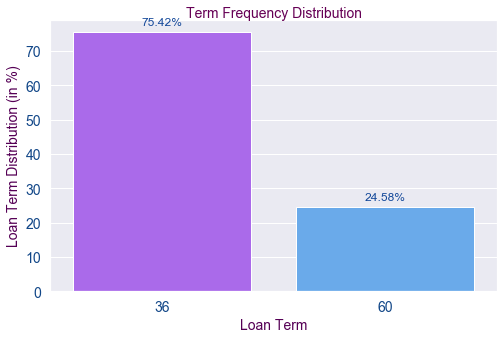

In [47]:
# Plot normalized frequency distribution for term
# We can see that there are more loan issued having 36 months term than 60 months term
# So usual loan term is 36 months
plot_box_or_bar_plot(x='term',
                     y='normalized_frequency_distribution',
                     data=term_freq_dist, 
                     xlabel='Loan Term',
                     ylabel='Loan Term Distribution (in %)',
                      title='Term Frequency Distribution',
                     plot=1, 
                     figsize=(8,5),
                     ticksFont_size=14)

Let's analyse the relationship between term and loan_status
- Do loan term have any significant impact on loan default
- Should bussiness consider the term of loan with combination of other factors for deciding whether the loan application should be accepted or rejected

In [48]:
# Let's check the correation matrix between term & loan_status
# We can clearly observe the positive linear relationship between the two variable
# This shows that longer term the term more is the tendency for loan default 
loan_df.loc[:,['term','loan_status']].corr()

,term,loan_status
term,1.000000,0.173487
loan_status,0.173487,1.000000


In [49]:
# Group loan_df on term and get the normalized frequency distribution over loan_status
term_loan_status_rel = get_group_frequency_dist(loan_df,['term'],'loan_status')
term_loan_status_rel

,term,loan_status,normalized_frequency_distribution
0,36,0,88.91
1,36,1,11.09
2,60,0,74.69
3,60,1,25.31


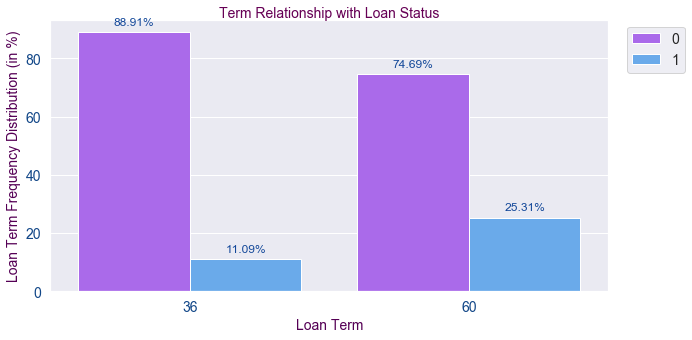

In [50]:
# Plot the relationship between term and loan status 
# loan_status = 0 (fully paid) & loan_status = 1 (charged-off)

# We can clearly observe that 60 months term have higher frequency for loan default 
# The loan default/charged-off is almost twice for 60 months term in comaprison to 36 month term 
# This indicated that term do have greater impact on loan default and higher term posses high risk for busisness 
# Applicants with higher loan term are twice more likely to default on loan than applicants with lower loan term
# From our analysis for loan term, we found term as one of the major driving factor for charged-off loan

plot_box_or_bar_plot(data=term_loan_status_rel,
                     x='term', 
                     y='normalized_frequency_distribution', 
                     hue='loan_status',
                     xlabel='Loan Term',
                     ylabel='Loan Term Frequency Distribution (in %)',
                     title='Term Relationship with Loan Status',
                     plot=1,
                     labelsFont_size=14,
                     figsize=(10,5),
                     ticksFont_size=14,
                     have_legend=True,
                     bbox_to_anchor = (1.15,1.0))

#### CAT-2::4 ->  int_rate , grade & sub_grade

In [51]:
# let's first check in metadata dictionary
# it doesn't have any missing values 
# there are 371 unique values
# most frequent value is 10.99% which constitutes approx 3% of total
print(metadata_df.loc['int_rate'])

Description                        Interest Rate on the loan
dtype                                                 object
uniques                                                  371
missing                                                    0
all_count                                              39717
non_nulls                                              39717
missing_percent                                            0
is_unique                                              False
most_frequent                                         10.99%
most_frequent_col_count_percent                        2.41%
Name: int_rate, dtype: object


In [52]:
# Remove % symbol from the int_rate values
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x:x.replace('%',''))

In [53]:
# Convert int_rate to float
loan_df['int_rate'] = loan_df['int_rate'].astype('float')
loan_df['int_rate'].dtypes

dtype('float64')

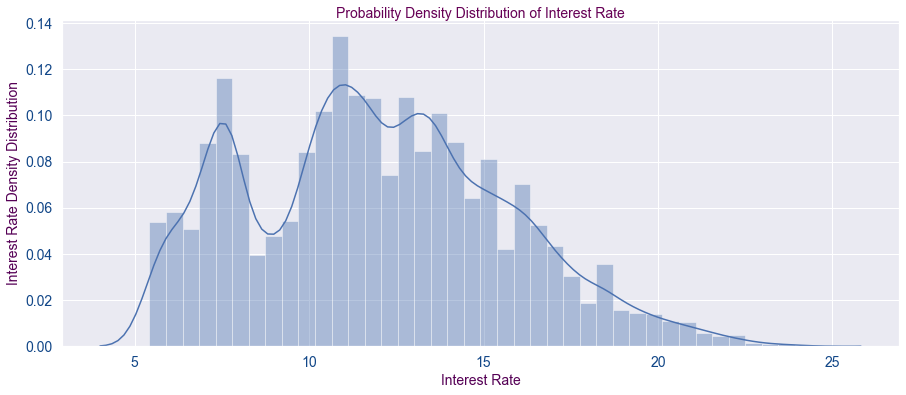

In [54]:
# Plot interest rate density distribution
# Most of the data fall under int_rate of (10 - 14)%
plot_dist_plot(loan_df['int_rate'],
               xlabel='Interest Rate',
               ylabel='Interest Rate Density Distribution',
               bins=40,
               title='Probability Density Distribution of Interest Rate',
               ticksFont_size=14)

In [55]:
# Get metadata info about grade from the metadata dictionary.
# There are 7 unique grades
# No mising values
# The most frequent grade is B which constitutes approx 30% of total
metadata_df.loc['grade']

Description                        LC assigned loan grade
dtype                                              object
uniques                                                 7
missing                                                 0
all_count                                           39717
non_nulls                                           39717
missing_percent                                         0
is_unique                                           False
most_frequent                                           B
most_frequent_col_count_percent                    30.26%
Name: grade, dtype: object

In [56]:
# Get normalized frequency distribution for the grade
grade_frequency_dist =  get_frequency_distribution(loan_df,'grade')
grade_frequency_dist

,grade,normalized_frequency_distribution
0,B,30.26
1,A,26.04
2,C,20.31
3,D,13.18
4,E,6.90
5,F,2.53
6,G,0.78


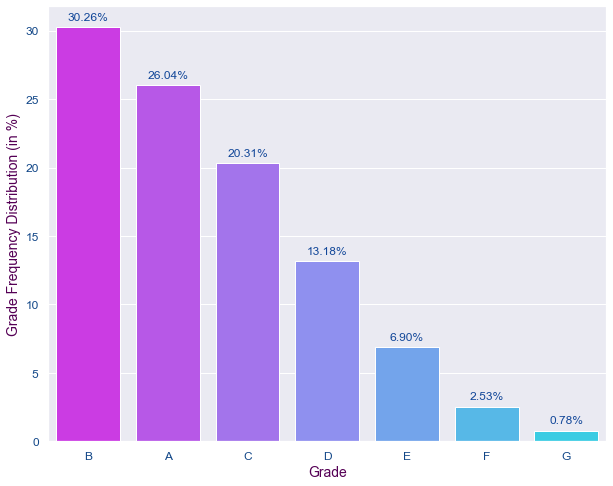

In [57]:
# Plot the normalized frequency distribution for grade using bar plot
# More that 70% of total data falls under A,B & C grades
plot_box_or_bar_plot(data=grade_frequency_dist,
                     x='grade',
                     y='normalized_frequency_distribution',
                     plot=1,
                     xlabel='Grade',
                     ylabel='Grade Frequency Distribution (in %)')

In [58]:
# Get metadata info about sub_grade from metadata dictionary.
# There are 35 unique subgrades
# No misisng values
# most frequent sub grade is B3 which constitutes approx 7% of total
metadata_df.loc['sub_grade']

Description                        LC assigned loan subgrade
dtype                                                 object
uniques                                                   35
missing                                                    0
all_count                                              39717
non_nulls                                              39717
missing_percent                                            0
is_unique                                              False
most_frequent                                             B3
most_frequent_col_count_percent                        7.34%
Name: sub_grade, dtype: object

##### Relationship between grade, sub_grade and int_rate
From domain and busisness understanding we get to know that interest rates are distributed among the sub grades, each sub grade have a interest rate defined
Let's find out how the interest rates are distributed for different sub-grades under grades.

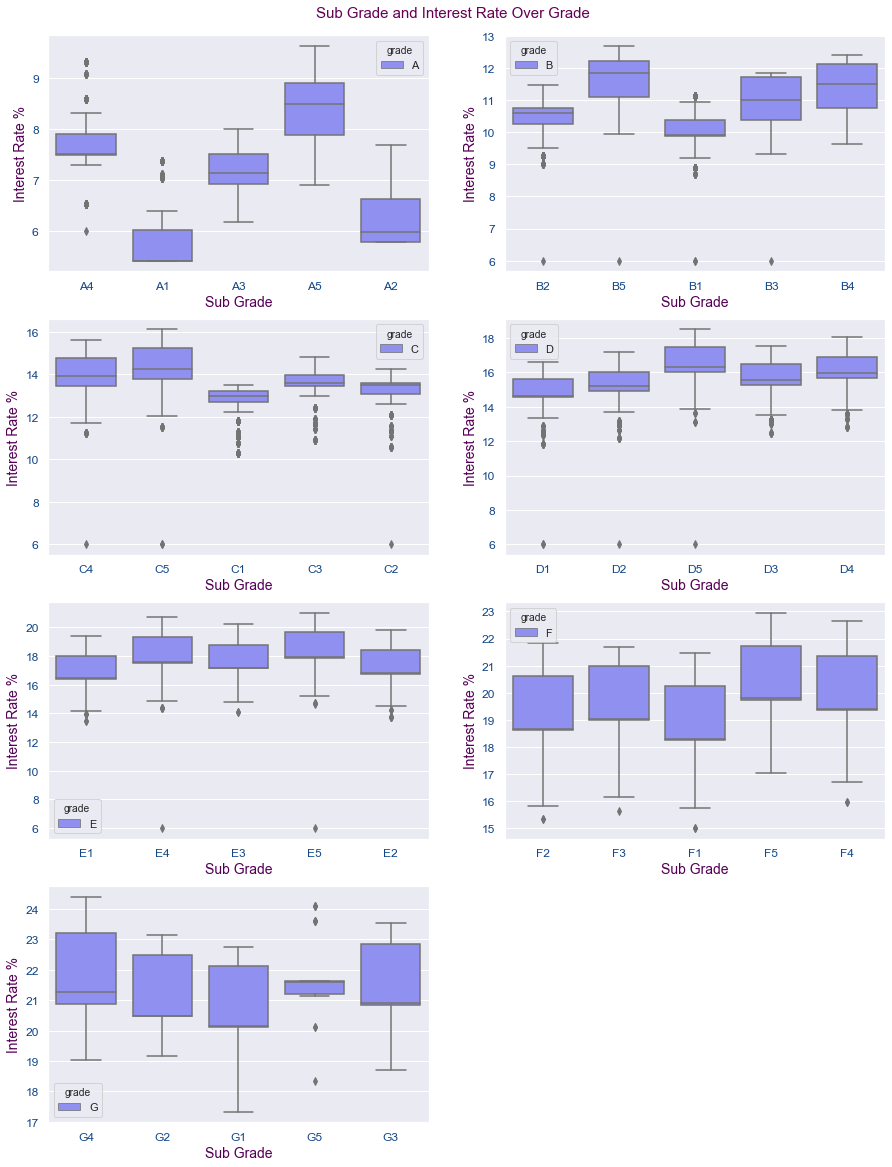

In [59]:
# Plot the relationship among sub_grade and int_rate for each grades
# We can observe the the interest rates tends to increase for subgrades in moving direction of grades from A to G
# So subgrades of grade G have more interest rate than subgrades of grade A 
# From the plots we can conclude that as the grades/sub-grades degrade, the interest rate rises 
# So for applicants having poor sub-grades, the interest rate will be higher than applicants having better grades/sub-grades

fig = plt.figure(figsize=(15,20))
title = fig.suptitle("Sub Grade and Interest Rate Over Grade",y=.90,fontsize=15, color='#660055')
plt.subplot(4,2,1)
plot_box_or_bar_plot(x="sub_grade", y="int_rate", hue='grade', plotfigure=False, data=loan_df.loc[(loan_df['sub_grade'].isin(['A1','A2','A3','A4','A5']))],
             xlabel='Sub Grade', ylabel='Interest Rate %');
plt.subplot(4,2,2)
plot_box_or_bar_plot(x="sub_grade", y="int_rate", hue='grade', plotfigure=False, data=loan_df.loc[(loan_df['sub_grade'].isin(['B1','B2','B3','B4','B5']))],
             xlabel='Sub Grade', ylabel='Interest Rate %');
plt.subplot(4,2,3)
plot_box_or_bar_plot(x="sub_grade", y="int_rate", hue='grade', plotfigure=False, data=loan_df.loc[(loan_df['sub_grade'].isin(['C1','C2','C3','C4','C5']))],
             xlabel='Sub Grade', ylabel='Interest Rate %');
plt.subplot(4,2,4)
plot_box_or_bar_plot(x="sub_grade", y="int_rate", hue='grade', plotfigure=False, data=loan_df.loc[(loan_df['sub_grade'].isin(['D1','D2','D3','D4','D5']))],
             xlabel='Sub Grade', ylabel='Interest Rate %');
plt.subplot(4,2,5)
plot_box_or_bar_plot(x="sub_grade", y="int_rate", hue='grade', plotfigure=False, data=loan_df.loc[(loan_df['sub_grade'].isin(['E1','E2','E3','E4','E5']))],
             xlabel='Sub Grade', ylabel='Interest Rate %');
plt.subplot(4,2,6)
plot_box_or_bar_plot(x="sub_grade", y="int_rate", hue='grade', plotfigure=False, data=loan_df.loc[(loan_df['sub_grade'].isin(['F1','F2','F3','F4','F5']))],
             xlabel='Sub Grade', ylabel='Interest Rate %');
plt.subplot(4,2,7)
plot_box_or_bar_plot(x="sub_grade", y="int_rate", hue='grade', plotfigure=False, data=loan_df.loc[(loan_df['sub_grade'].isin(['G1','G2','G3','G4','G5']))],
             xlabel='Sub Grade', ylabel='Interest Rate %');


In [60]:
# We have the required information available via sub grades hence we can drop grades variable which 
# is just a wrapper obove sub grade, hence We can use sub grade for further analysis
loan_df.drop('grade', 1, inplace=True)
loan_df.shape

(38577, 39)

#####  Analyse the relationship between int_rate and loan_status
Let's figure out whether interest rates have any significant impact on the Loan default (charged-off) or not ? <br/>
- how interest rate varies for the two loan status (charged-off & fully paid)
- do the loan having high/low interest rates poses high/low risk for the bussiness in terms of loan default

In [61]:
# Get the summary statistics of interest rate for fully paid & charged-off loan
# loan_status = 0 (fully paid) & loan_status = 1 (charged-off)
# Average interest rate for charged-off loan is higher than fully paid loan
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11
1,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40


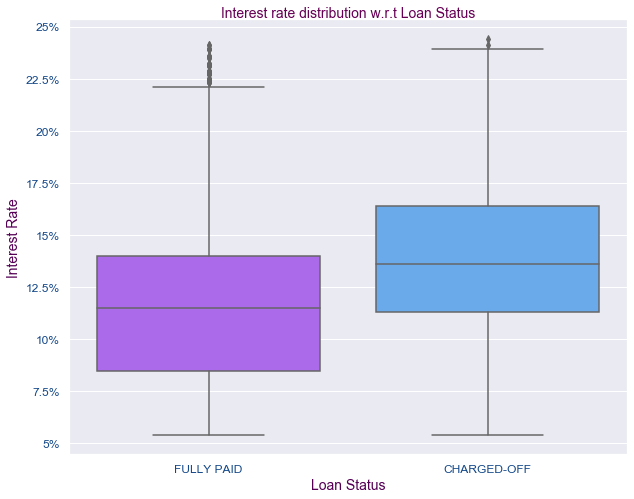

In [62]:
# Let's compare the int_rate summary statistics such as mean, median,max, IQR range, outliers etc for loan status
# From box plot we can clearly observe that the charged off loan or default loan status have high interest rates
# From the plot, it is clear that charged-off loans tends to have higher interest rates than fully paid loans
# So, higher interest rates have positive relationship with the loan default, hence we can also deduce that the loan 
# with high interest rates poses risk for the loan repayment (greater probability of loan default)

xticks = [[0,1],['FULLY PAID','CHARGED-OFF']]
yticks = [[5.0,7.5,10.0,12.5,15.0,17.5,20.0,22.5,25.0],['5%','7.5%', '10%', '12.5%', '15%', '17.5%', '20%', '22.5%', '25%']]
plot_box_or_bar_plot(data=loan_df,x='loan_status',y='int_rate', xlabel='Loan Status', ylabel='Interest Rate', 
              title='Interest rate distribution w.r.t Loan Status', xticks = xticks, yticks = yticks)

Let's find out what range of interest rates poses more risk of loan default or the average interest rates in case of loan default

In [63]:
# Get the summary statistics for the int_rate where the loan_status is charged-off i.e 1
# The mean int_rate for charged-off/default loan status is approx 14%
# Also, there is not much difference between mean and the median value which is clear from 50 percentile value
# 75% of the observations or data lie under 17% interest rate
# We do have some outliers as we can see that the max range for interest rate is approx 24%,

loan_df.loc[(loan_df['loan_status'] == 1),'int_rate'].describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

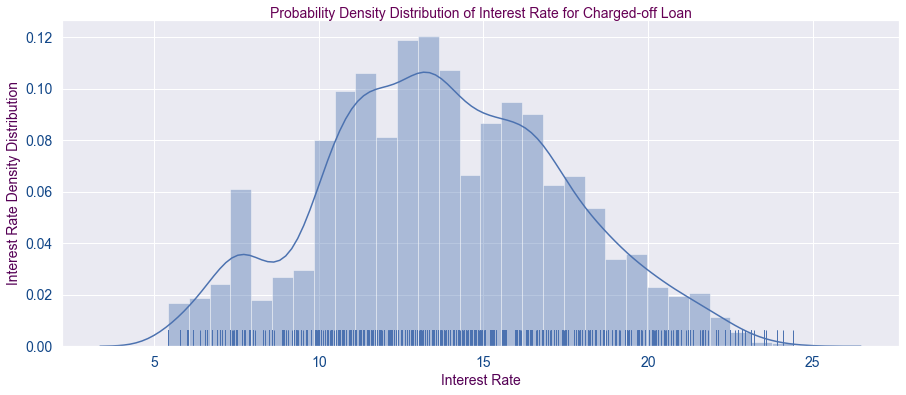

In [64]:
# Check int_rate distribution for charged off or default loan
# loan_status = 1 for charged-off/default loan
# The density distribution of interest rate for loan default is centred between (13-14) %
# Using rug plot, we can see the high concentraion of data points in the range of  (12-17) %
# So, maximim loan default interest rates lie in between (12-16) %
# We can also observe the outliers from (20-25) % interest rate range.
# The conclusion from the density distribution again support the claim that higher interest rates poses high
# risk for loan default

plot_dist_plot(loan_df.loc[(loan_df['loan_status'] == 1),'int_rate'],
               rug=True,
               xlabel='Interest Rate',
               ylabel='Interest Rate Density Distribution',
               title='Probability Density Distribution of Interest Rate for Charged-off Loan',
               ticksFont_size=14)


In [65]:
# Let's also get the correlation between interest rate and loan status
# We see the positive correlation between the loan_status & int_rate
loan_df.loc[ :,['int_rate','loan_status']].corr()

,int_rate,loan_status
int_rate,1.00000,0.21139
loan_status,0.21139,1.00000


##### Analyse the relationship between sub_grade and loan_status
We have seen  the impact of interest rate on charged-off loan, we are also familiar with sub-grade and interest rate relationship, now let's define the chaged-off loan in terms of sub-grade for ease of categorisation and presentation of result.

In [66]:
# Get the normalized frequency distribution of sub grades around loan status
sub_grade_group_freq_dist =  get_group_frequency_dist(loan_df,['sub_grade'],'loan_status')
sub_grade_group_freq_dist

,sub_grade,loan_status,normalized_frequency_distribution
0,A1,0,97.37
1,A1,1,2.63
2,A2,0,95.09
3,A2,1,4.91
4,A3,0,94.31
...,...,...,...
65,G3,1,42.22
66,G4,0,75.93
67,G4,1,24.07
68,G5,0,65.52


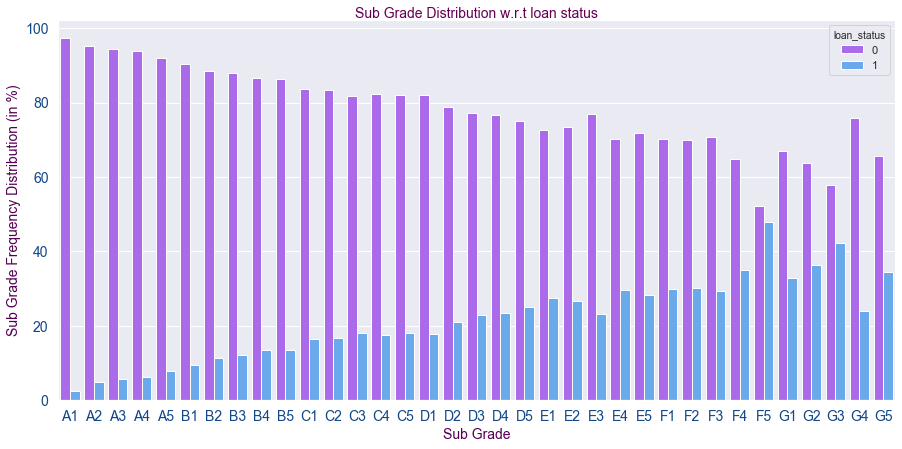

In [67]:
# Plot normalized frequency distribution of sub grades w.r.t loan status
# Good loans (fully paid) tends to have better sub grade, so for lendor, better sub grades are good indicator of good loans
# Better the sub grades better the chances of repaying loan , hence for business the sub grades are
# good measure w.r.t other factor to accept or reject a loan

# We can observe almost linear relationship between sub grades and loan status from below plot
# As the sub grades worsen so is the likelihood of loan repayment declines too.

# Hence the findings with this plot supports that as we move down in the lane of sub-grades w.r.t grades (from A TO G), the 
# chances of loan default/charged-off loan risess significantly.

plot_box_or_bar_plot(x='sub_grade', 
                     y='normalized_frequency_distribution',
                     hue='loan_status', 
                     data=sub_grade_group_freq_dist,figsize=(15,7),
                     plot=1,
                     xlabel='Sub Grade',
                     ylabel='Sub Grade Frequency Distribution (in %)',
                     title = 'Sub Grade Distribution w.r.t loan status',
                     labelsFont_size=14,
                     ticksFont_size=14,
                     annotate=False)


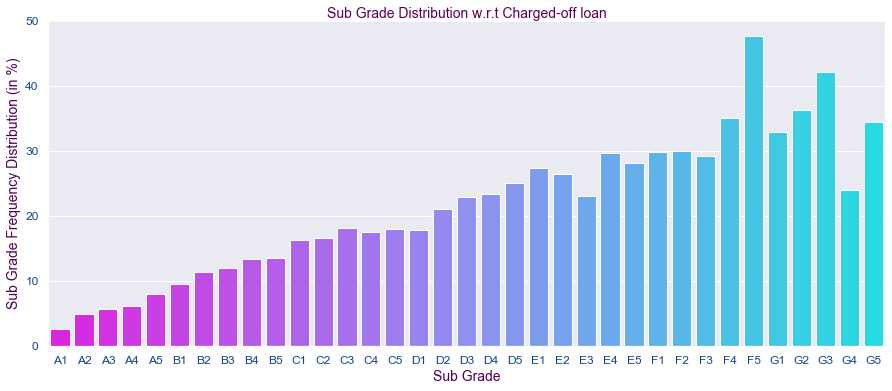

In [68]:
# Plotting sub grade and charged-off loan relationship 
# This plot is the sub part of above plot whichs shows the linear relationship between sub grade 
# and charged-off loans i.e loan_status = 1

plot_box_or_bar_plot(x='sub_grade', y='normalized_frequency_distribution',
                data=sub_grade_group_freq_dist.loc[(sub_grade_group_freq_dist['loan_status'] == 1)],
                plot=1,
                figsize=(15,6),
                annotate=False,
                xlabel='Sub Grade',
                ylabel='Sub Grade Frequency Distribution (in %)',
                title = 'Sub Grade Distribution w.r.t Charged-off loan')

#### Let's perform segmented univariate analysis on term & int_rate  to find combined effect on Loan status
- Let's find out how term and interest rates vary together for fully paid & charged-off loans
- We have analysed before that longer term have more charged-off frequency and similarly charged-off loans tends to have    high interest rate
- let's find out how term and interest rates vary for two loan status 

In [69]:
# Get the summary statistics of group on term w.r.t int_rate 
# The average interest rate for 60 months loan term is higher than average interest rate for 36 months loan term
loan_df.groupby(['term'])['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36,29096.0,11.004656,3.233546,5.42,7.90,10.99,13.47,23.22
60,9481.0,14.778791,3.551355,5.79,11.86,14.91,17.49,24.40


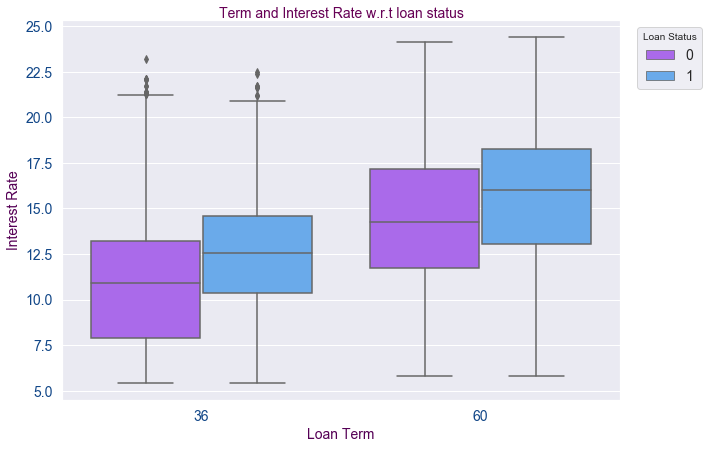

In [70]:
# Plot the relationship between term, interest rate w.r.t loan status
# loan_status=0 (fully paid) & loan_status=1 (charged-off)

# From the below plot, it is clear that longer terms tends to have higher interest rate, both higher interest rate
# & longer term tends to pose high risk for the loan default

# This analysis support with evidence that term & interest rate are driving variables for loan default analysis
# Applicants with 60 months term and higher interest rates (poor sub grade) are less likely to repay the loan 
# than applicants with 36 months term and considerably lower interest rate (better sub grade)
plot_box_or_bar_plot(y='int_rate',
                     x='term',
                     data=loan_df,
                     hue='loan_status',
                     figsize=(10,7),
                     xlabel='Loan Term',
                     ylabel='Interest Rate',
                     labelsFont_size=14,
                     have_legend=True,
                     title = 'Term and Interest Rate w.r.t loan status',
                     legedTitle='Loan Status',
                     bbox_to_anchor=(1.16,1),
                     ticksFont_size=14)

##### We found term, sub grade & interest rate ( under sub grade only) to be driving variables for loan default, let's consolidate our findings and result of analysis till now before moving ahead to find more driving variables and useful insights
- From above analysis we found that term, interest rate and sub grades have significant impact on loan default
- We have also seen how interest rates are distributed accross the sub grades which are wrapped under grades.
- Each sub grades have a defined interest rate which increases as the sub grad worsen
- We can use sub grade to communicate the insight for interest rate too for ease of understanding and better clarity as these two are closely related
- Better the sub grades, lower the interest rates hence lower the likelihood of loan default
- Lower sub grade poses high risk of loan default for the bissiness and attract high interest rates from lenders
- Term of 36 months have low charged-off rate as well as it lesser interest rates too, but as the term increase to 60 months, the charged-off rate increases significantly.

#### CAT-5 : emp_title

In [71]:
# let's first check in metadata dictionary
# Approx 6% missing values 
# Aprrox 72% of the rows have unique values
# Most frequent value 'US Army' constitutes only 0.34% of the total
# With huge unique value count and misisng values presence, this variable is not adding any significant insights to our analysis
metadata_df.loc['emp_title']

Description                        The job title supplied by the Borrower when ap...
dtype                                                                         object
uniques                                                                        28820
missing                                                                         2459
all_count                                                                      39717
non_nulls                                                                      37258
missing_percent                                                                  6.2
is_unique                                                                      False
most_frequent                                                                US Army
most_frequent_col_count_percent                                                0.34%
Name: emp_title, dtype: object

In [72]:
# Let's drop the emp_title from loan_df dataset, no need to keep variables which are not useful for our analysis 
loan_df.drop('emp_title',1,inplace=True)

#### CAT-6 : emp_length

In [73]:
# let's first check in metadata dictionary
# Approx 3% missing values 
# There are 11 unique values
# Most frequent value '10+ years' constitutes approx 22% of the total
metadata_df.loc['emp_length']

Description                        Employment length in years. Possible values ar...
dtype                                                                         object
uniques                                                                           11
missing                                                                         1075
all_count                                                                      39717
non_nulls                                                                      38642
missing_percent                                                                  2.7
is_unique                                                                      False
most_frequent                                                              10+ years
most_frequent_col_count_percent                                               22.36%
Name: emp_length, dtype: object

In [74]:
# This function will return the first digit from string or 0 if there are no digit.
# for cases where we have < with digit, we have subtracted 0.5 from the digit and
# for cases where we have + in digit, we have added 0.5 in the digit

def get_digit(x):
    if '<' in str(x):
        num_1 = re.findall(r'\d+', str(x))
        return  ((int)(num_1[0]) - 0.5)
    if '+' in str(x):
        num_2 = re.findall(r'\d+', str(x))
        return ((int)(num_2[0])) + 0.5
    
    match = re.findall(r'\d+', str(x))
    if len(match) > 0 :
        return match[0]
    else :
        return 0

In [75]:
# From frequency count we can see that emp_length is an ordered categorical variable
# We have to transform the value of this variable so that we could perform relative analysis
# We will have to pick numeric values from string values
print(loan_df.emp_length.value_counts())

# let's transform the values in this column using the custom function get_digit()
# this function will impute 0 for the values which are misisng
loan_df.emp_length = loan_df.emp_length.apply(lambda x: get_digit(x) )

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64


In [76]:
# Check the type of emp_length after transformation
print(loan_df.emp_length.dtype)

# let's convert the data type of emp_length from object to float
loan_df.emp_length = loan_df.emp_length.astype('float64')
# Verify the data type of emp_length
print(loan_df.emp_length.dtype)

object
float64


In [77]:
# Get normalized frequency distribution for employee length
emp_legth_dist = get_frequency_distribution(loan_df,'emp_length')
emp_legth_dist

,emp_length,normalized_frequency_distribution
0,10.5,22.00
1,0.5,11.69
2,2.0,11.12
3,3.0,10.40
4,4.0,8.66
5,5.0,8.28
6,1.0,8.21
7,6.0,5.62
8,7.0,4.44
9,8.0,3.72


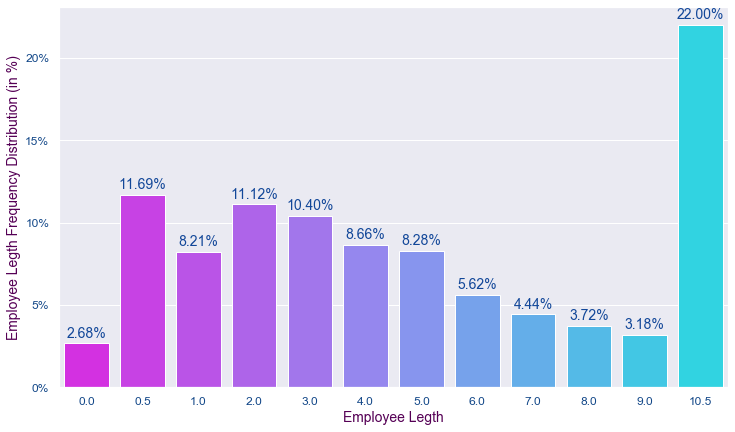

In [78]:
# Plot the normalized frequency distribution of emp_length variable
# Most of issued loan applicants have the employee length of more than 10 years
plot_box_or_bar_plot(x='emp_length',
                     y='normalized_frequency_distribution',
                     data=emp_legth_dist,figsize=(12,7),
                     plot=1,
                     xlabel='Employee Legth',
                     ylabel='Employee Legth Frequency Distribution (in %)',
                     yticks=[[0,5,10,15,20],['0%','5%','10%','15%','20%']],
                     labelsFont_size=14,
                     ticksFont_size=12,
                     annoteSize=14)

In [79]:
# Get the summary statistics of emp_length w.r.t loan status
# loan_status=0 (fully paid) & loan_status=1 (charged-off)
# We can observe that there is not much difference between the average emp_length for fully paid & charged-off loan status
loan_df.groupby('loan_status')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,4.964643,3.672499,0.0,2.0,4.0,8.0,10.5
1,5627.0,5.050116,3.763431,0.0,2.0,4.0,9.0,10.5


#### Analyze the impact of Employee length on loan status
- do greater employee length results into good loan 
- can bussiness decide the loan acceptance or rejection based on employee length
- do we have enough evidence to conclude the impact of employee legth on loan default

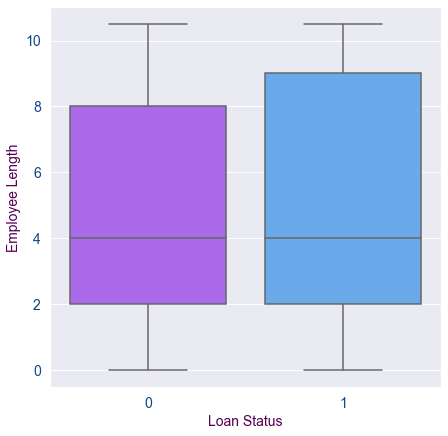

In [80]:
# Plot the summary staistics of emp_length w.r.t loan status
# We can't conclude based on the plot whether emp_length have any impact on loan default (loan_status=1) or not
plot_box_or_bar_plot(y='emp_length',
                     x='loan_status',
                     data=loan_df,
                     figsize=(7,7),
                     xlabel='Loan Status',
                     ylabel='Employee Length',
                     labelsFont_size=14,
                     ticksFont_size=14)

In [81]:
# Get the emp_length performance w.r.t loan_status ( 0 : fully paid , 1 : charge-off)
# Group loan_df on emp_length and get the normalized frequency distribution over loan_status
emp_legth_group_dist = get_group_frequency_dist(loan_df, ['emp_length'], 'loan_status')

# Remove the emp_legth of 0 as this we have imputed for misisng values
emp_legth_group_dist = emp_legth_group_dist.loc[~(emp_legth_group_dist['emp_length'] == 0.0)]
emp_legth_group_dist

,emp_length,loan_status,normalized_frequency_distribution
2,0.5,0,85.83
3,0.5,1,14.17
4,1.0,0,85.61
5,1.0,1,14.39
6,2.0,0,86.79
7,2.0,1,13.21
8,3.0,0,86.17
9,3.0,1,13.83
10,4.0,0,86.18
11,4.0,1,13.82


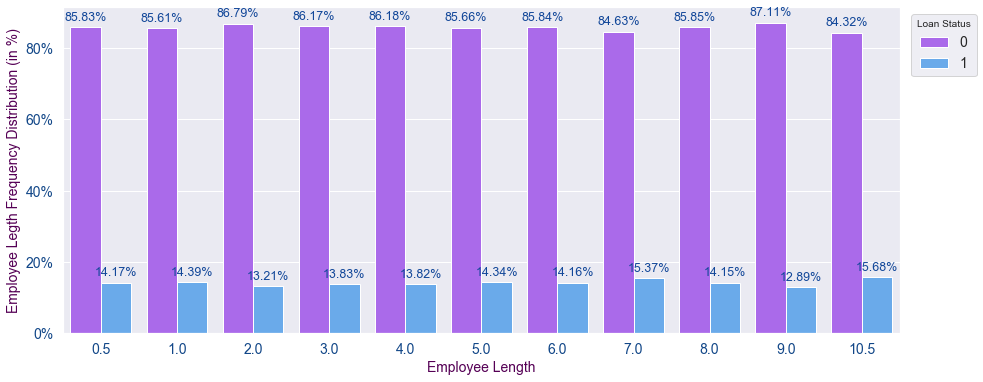

In [82]:
# Plotting the relationship of employee length w.r.t loan status (fully paid or charge-off)
# employee length doesn't seem to vary much w.r.t loan status for both good loan or loan default

plot_box_or_bar_plot(x='emp_length', 
                     y='normalized_frequency_distribution',
                     hue='loan_status',
                     data=emp_legth_group_dist,
                     plot=1,
                     figsize=(15,6),
                     annoteSize=12.5,
                     xlabel='Employee Length',
                     ylabel='Employee Legth Frequency Distribution (in %)',
                     yticks=[[0,20,40,60,80],['0%','20%','40%','60%','80%']],
                     labelsFont_size=14,
                     ticksFont_size=14,
                     have_legend = True,
                     bbox_to_anchor=(1.10,1),
                     legedTitle = 'Loan Status')

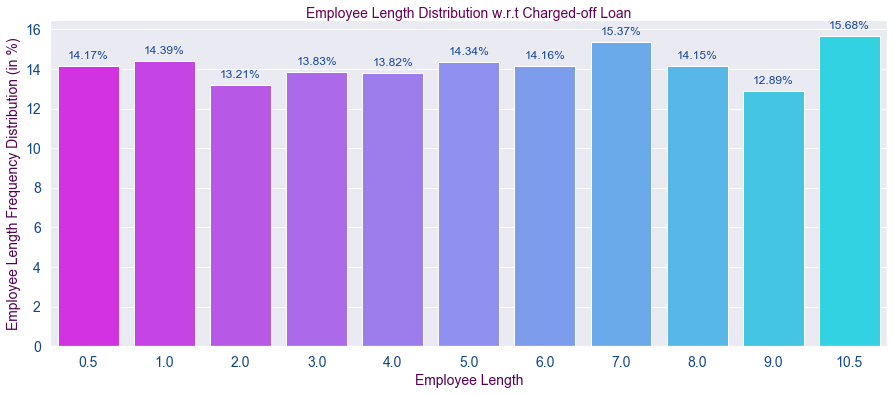

In [83]:
# Plotting frequency distribution of emp_length w.r.t loan_status where loan_status = 1 (charge-off) - Loan Default
# There is not much variation in emp_length for charged off loan
# Most of the emp_length have approx similar distribution for charge-off loans

plot_box_or_bar_plot(x='emp_length', 
                     y='normalized_frequency_distribution',
                     data=emp_legth_group_dist.loc[(emp_legth_group_dist['loan_status'] == 1)],
                     figsize=(15,6),
                     plot=1,
                     xlabel='Employee Length',
                     ylabel='Employee Length Frequency Distribution (in %)',
                     ticksFont_size=14,
                     title='Employee Length Distribution w.r.t Charged-off Loan')

In [84]:
# From all the above analysis for emp_length, we can't conclude the positive or negative impact of emp_legth on loan default i.e. loan_status variable
# Let's drop emp_length from loan_df as we have observed that it is not contributing much to our analysis of loan default
loan_df.drop('emp_length',1,inplace=True)

In our analysis of employee length we haven't found it as strong driving variable for loan default hence we will not suggest employee length as a measure for the identification of risky loan applicants

#### CAT-7 :home_ownership

In [85]:
# let's first check in metadata dictionary
# No missing values 
# There are 5 unique values
# Most frequent unique value 'RENT' constitutes approx 48% of the total
metadata_df.loc['home_ownership']

Description                        The home ownership status provided by the borr...
dtype                                                                         object
uniques                                                                            5
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                   RENT
most_frequent_col_count_percent                                               47.58%
Name: home_ownership, dtype: object

In [86]:
# Get normalized frequency distribution for home_ownership
home_ownership_dist = get_frequency_distribution(loan_df,'home_ownership')
home_ownership_dist

,home_ownership,normalized_frequency_distribution
0,RENT,47.90
1,MORTGAGE,44.12
2,OWN,7.71
3,OTHER,0.25
4,NONE,0.01


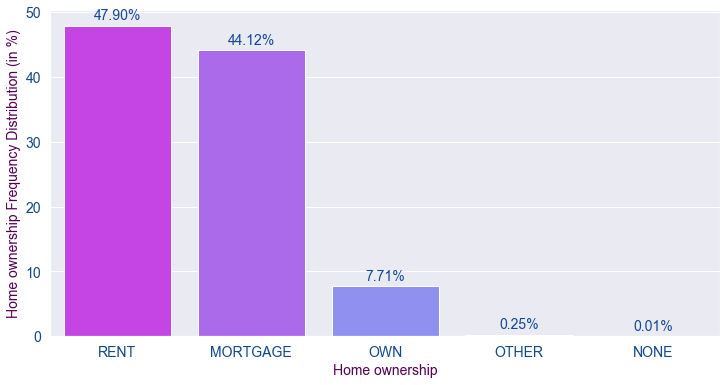

In [87]:
# Plot the normalized frequency distribution of home_ownership variable
# 90% of issued loan Home ownership status is either MORTGAGE or RENT 
plot_box_or_bar_plot(x='home_ownership',
                     y='normalized_frequency_distribution',
                     data=home_ownership_dist,
                     figsize=(12,6),
                     plot=1,
                     xlabel='Home ownership',
                     ylabel='Home ownership Frequency Distribution (in %)',
                     ticksFont_size=14,
                     annoteSize=14)



##### Analyse the impact of Home ownership status on the Loan default
- Do applicants living on rent poses more risk than those who have own house
- Do bussiness should take home ownership into account for deciding on loan acceptance
- do we have enough evidence to support loan status based on home ownership

In [88]:
# Group home_ownership on term and get the normalized frequency distribution over loan_status
home_ownership_default_group = get_group_frequency_dist(loan_df,['home_ownership'],'loan_status')
home_ownership_default_group

,home_ownership,loan_status,normalized_frequency_distribution
0,MORTGAGE,0,86.33
1,MORTGAGE,1,13.67
2,NONE,0,100.00
3,OTHER,0,81.63
4,OTHER,1,18.37
5,OWN,0,85.11
6,OWN,1,14.89
7,RENT,0,84.64
8,RENT,1,15.36


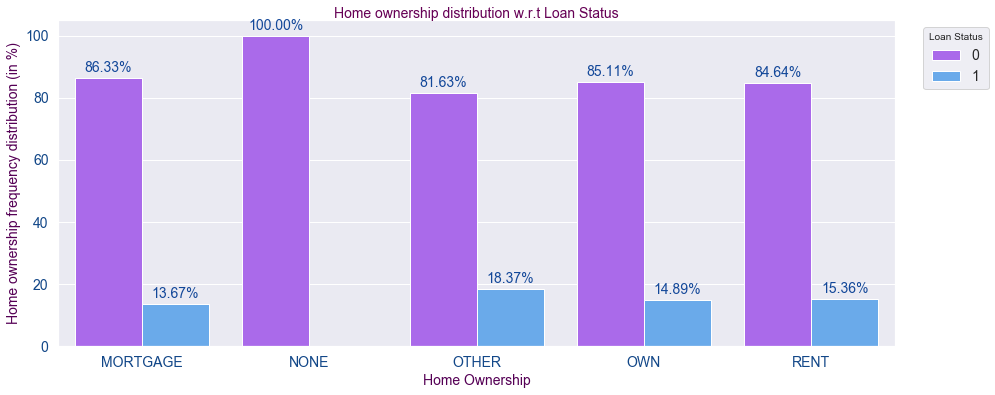

In [89]:
# Plot the relationship between home_ownership & loan_status
# loan_status=0 (fully paid) & loan_status=1 (charged-off)
# We can observe that Other category in home_ownership have the highest loan default (chared-off) frequency
# Rent & Own home ownership category applicants are more likely to default than Mortgage but 
# the difference is not too significant 

plot_box_or_bar_plot(x='home_ownership',
                     y='normalized_frequency_distribution',
                     hue='loan_status',
                     data=home_ownership_default_group,
                     figsize=(15,6),
                     plot=1,
                     have_legend=True,
                     legedTitle='Loan Status',
                     bbox_to_anchor=(1.12,1),
                     xlabel='Home Ownership',
                     ylabel='Home ownership frequency distribution (in %)',
                     ticksFont_size=14,
                     title='Home ownership distribution w.r.t Loan Status',
                     annoteSize=14)

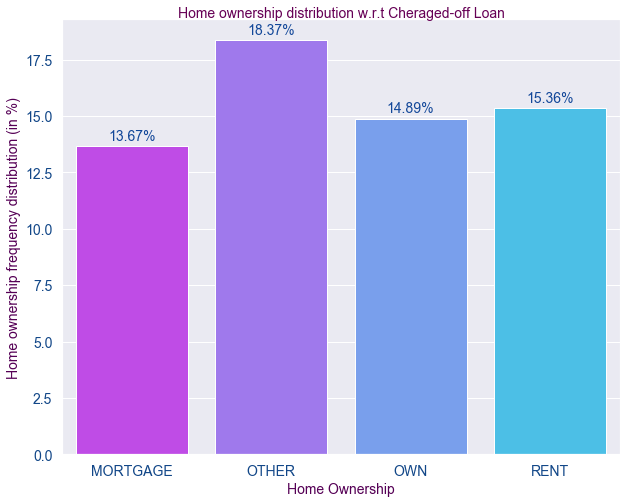

In [90]:
# Plot frequency distribution bewteen home_ownership w.r.t is_default where is_default = 1 (charge-off) - Loan Default
# There is not much difference between the charged-off rate for different home ownership category
# Although Other category can be labeled as high risk but then we have seen that it constituttes below 0.5% of total records
# we have which is not significant enough to draw any fact driven conclusion
# We are not too sure or we don't have enough evidence in this case to draw solid conclusion based on home ownership status

# Business can use home ownership as additional factor but from our analysis we didn't find it as strong indicator for loan default
plot_box_or_bar_plot(x='home_ownership', 
                     y='normalized_frequency_distribution',
                     data=home_ownership_default_group.loc[(home_ownership_default_group['loan_status'] == 1)],
                     plot=1,
                     xlabel='Home Ownership',
                     ylabel='Home ownership frequency distribution (in %)',
                     ticksFont_size=14,
                     title='Home ownership distribution w.r.t Cheraged-off Loan',
                     annoteSize=14)

In our analysis of home ownership,  haven't found it as strong driving variable for loan default hence we will not suggest home ownership status as identification of risky loan applicants by the business

#### CAT-9: verification_status

In [91]:
# let's first check in metadata dictionary
# it doesn't have missing values 
# There are 3 unique values
# Most frequent unique value frequency count percent is approx 43%
metadata_df.loc['verification_status']

Description                        Indicates if income was verified by LC, not ve...
dtype                                                                         object
uniques                                                                            3
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                           Not Verified
most_frequent_col_count_percent                                                42.6%
Name: verification_status, dtype: object

In [92]:
# Get normalized frequency distribution for home_ownership
verification_status_dist = get_frequency_distribution(loan_df,'verification_status')
verification_status_dist

,verification_status,normalized_frequency_distribution
0,Not Verified,43.27
1,Verified,31.64
2,Source Verified,25.08


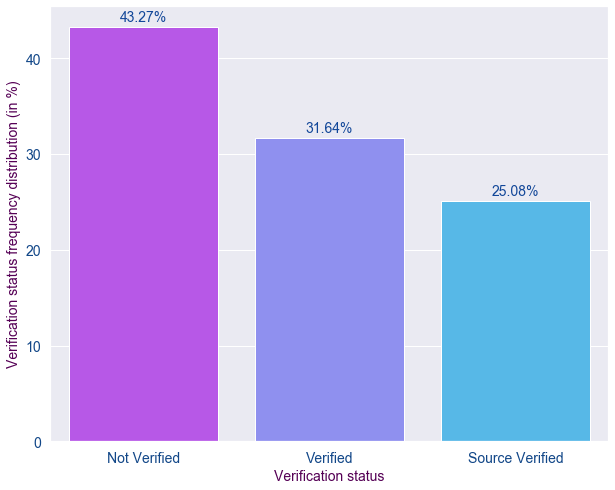

In [93]:
# Plot the normalized frequency distribution of verification_status
# Almost 40% of the loan applicants income was not verified.
plot_box_or_bar_plot(x='verification_status', 
                     y='normalized_frequency_distribution',
                     data=verification_status_dist,
                     plot=1,
                     xlabel='Verification status',
                     ylabel= 'Verification status frequency distribution (in %)',
                     ticksFont_size=14,
                     annoteSize=14)

In [94]:
# Group loan_df on verification_status and get the normalized frequency distribution over loan_status
verification_status_default_group = get_group_frequency_dist(loan_df,['verification_status'],'loan_status')
verification_status_default_group

,verification_status,loan_status,normalized_frequency_distribution
0,Not Verified,0,87.17
1,Not Verified,1,12.83
2,Source Verified,0,85.18
3,Source Verified,1,14.82
4,Verified,0,83.20
5,Verified,1,16.80


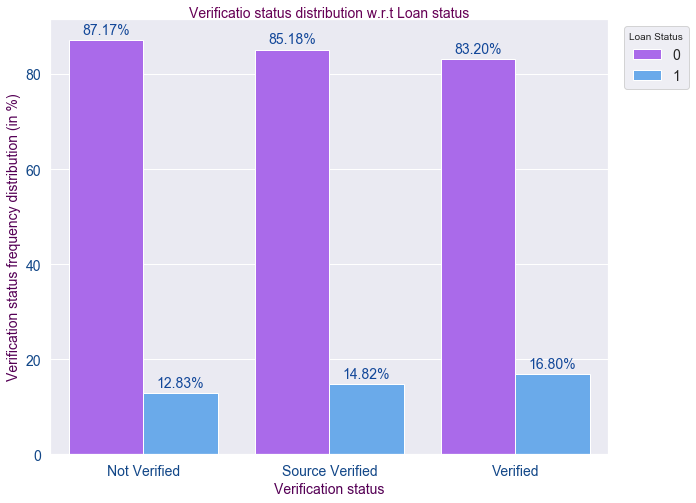

In [95]:
# Plot the relationship between verification_status & loan_status 
# loan_status = 0 (fully paid) & loan_status = 1 (charged-off)
# We can observe that the Verified loans have the highest loan default (chare-off) frequency

plot_box_or_bar_plot(x='verification_status', 
                     y='normalized_frequency_distribution',
                     hue='loan_status', 
                     data=verification_status_default_group,
                     plot=1,
                     have_legend=True,
                     legedTitle='Loan Status',
                     bbox_to_anchor=(1.157,1),
                     xlabel='Verification status',
                     ylabel='Verification status frequency distribution (in %)',
                     ticksFont_size=14,
                     title='Verificatio status distribution w.r.t Loan status',
                     annoteSize=14)

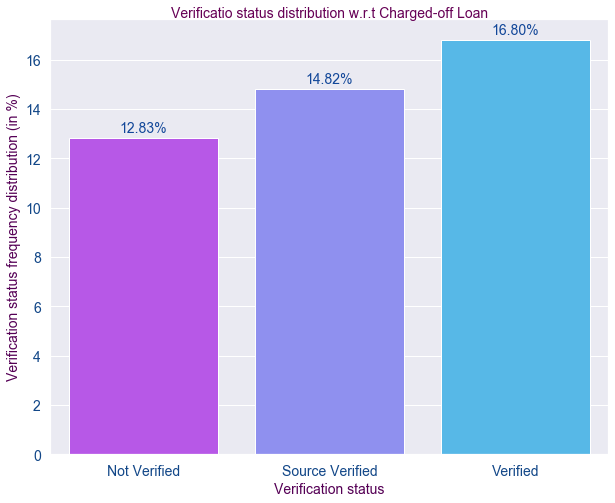

In [96]:
# Plot frequency distribution bewteen verification_status w.r.t loan_status where loan_status = 1 (charge-off)
# We can observe that the Verified status have higher frequnecy for loan default or cherged-off

plot_box_or_bar_plot(x='verification_status',
                     y='normalized_frequency_distribution',
                     data=verification_status_default_group.loc[(verification_status_default_group['loan_status'] == 1)],
                     plot=1,
                     xlabel='Verification status',
                     ylabel='Verification status frequency distribution (in %)',
                     ticksFont_size=14,
                     title='Verificatio status distribution w.r.t Charged-off Loan',
                     annoteSize=14)

Although we have observed that verification status and loan default have coherent relationship and the verified loans defaults the most but we can't take it as driving variables this attribute comes to the picture when the loan has been accepted and hence it will not be of any ggod for predictive analysis but business could use this finding to enhance the verificatio process to fill the gap

#### CAT-10: issue_d

In [97]:
# let's first check in metadata dictionary
# it doesn't have missing values 
# There are 55 unique values
# Most frequent unique value frequency count percent is approx 6%
metadata_df.loc['issue_d']

Description                        The month which the loan was funded
dtype                                                           object
uniques                                                             55
missing                                                              0
all_count                                                        39717
non_nulls                                                        39717
missing_percent                                                      0
is_unique                                                        False
most_frequent                                                   Dec-11
most_frequent_col_count_percent                                  5.69%
Name: issue_d, dtype: object

In [98]:
# Convert issue_d column to Date using pandas to_datetime() function
loan_df.issue_d = pd.to_datetime(loan_df.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [99]:
# Create derive column for month and year based on issue_d
# This will simplify analysis based on year and month
loan_df.loc[:,'issue_d_month'] = loan_df.issue_d.dt.month
loan_df.loc[:,'issue_d_year'] = loan_df.issue_d.dt.year

In [100]:
# Group loan_df on derived variable issue_d_month and get the normalized frequency distribution over loan_status
issue_d_month_default_group = get_group_frequency_dist(loan_df,['issue_d_month'],'loan_status')
issue_d_month_default_group

,issue_d_month,loan_status,normalized_frequency_distribution
0,1,0,86.51
1,1,1,13.49
2,2,0,87.70
3,2,1,12.30
4,3,0,87.11
5,3,1,12.89
6,4,0,86.93
7,4,1,13.07
8,5,0,84.04
9,5,1,15.96


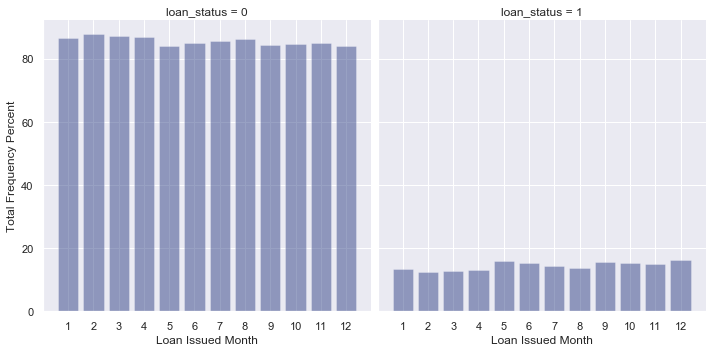

In [101]:
# Plot the relationship between issue_d_month and loan_status
# loan_status = 0 (Fully Paid) - We see almost similar distribution across months
# loan_status = 1 (Charged-off) - Month 12 or December have slightly more charged-off frequency

plot_facet_bar_plot(issue_d_month_default_group,
                    col="loan_status",
                    height=5, 
                    aspect=1,
                    xticks=[1,2,3,4,5,6,7,8,9,10,11,12],
                    x='issue_d_month',
                    y='normalized_frequency_distribution',
                    labels=['Loan Issued Month','Total Frequency Percent'])

In [102]:
# Create normalized frequency distribution of issue_d_year w.r.t loan_status
# We can observe that the loan funded in year 2007 have the worse charged-off % (approx 18%)
issue_d_year_default_group = get_group_frequency_dist(loan_df,['issue_d_year'],'loan_status')
issue_d_year_default_group

,issue_d_year,loan_status,normalized_frequency_distribution
0,2007,0,82.07
1,2007,1,17.93
2,2008,0,84.19
3,2008,1,15.81
4,2009,0,87.40
5,2009,1,12.60
6,2010,0,87.12
7,2010,1,12.88
8,2011,0,84.13
9,2011,1,15.87


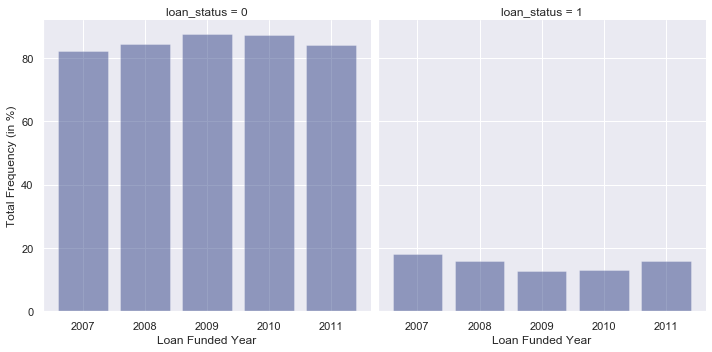

In [103]:
# Plot the relationship between issue_d_year and loan_status based on the frequency distribution
# loan_status = 0 (Fully Paid) - 2009 & 10 had more loan funded 
# loan_status = 1 (Charged-off) - 2007 & 11 had the highest charged-off frequency
# This might help bussiness to dig deeper for the cause behind high loan default rate in particular year, so that they can come
# up with better strategy to deal with year on fluctuations in loan default

plot_facet_bar_plot(issue_d_year_default_group,
                    col="loan_status",
                    height=5, 
                    aspect=1,
                    x='issue_d_year',
                    y='normalized_frequency_distribution',
                    labels=['Loan Funded Year','Total Frequency (in %)'])


<b>Let's find out which month issued loan across all the years have high charged-off frequency.. <b>

In [104]:
# Group loan_df on issue_d_year and issue_d_month, get the normalized frequency distribution 
# for loan status = 1 i.e for charged-off loan (default loan)

issue_d_year_month_default_group = get_group_frequency_dist(loan_df,['issue_d_year','issue_d_month'],'loan_status')
issue_d_year_month_default_group = issue_d_year_month_default_group.loc[(issue_d_year_month_default_group['loan_status']==1)]
issue_d_year_month_default_group.sort_values(by='normalized_frequency_distribution', ascending=False)

,issue_d_year,issue_d_month,loan_status,normalized_frequency_distribution
7,2007,10,1,21.28
3,2007,8,1,21.21
11,2007,12,1,21.18
107,2011,12,1,20.71
25,2008,7,1,20.48
9,2007,11,1,18.92
13,2008,1,1,18.13
93,2011,5,1,17.96
19,2008,4,1,17.42
17,2008,3,1,16.95


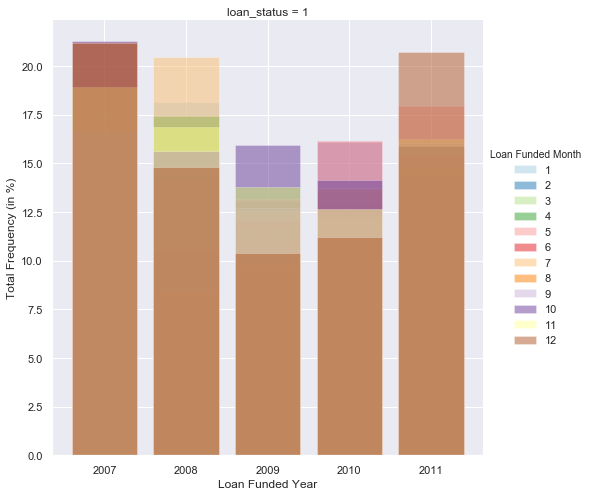

In [105]:
# Plot the relationship between loan funded year, month w.r.t loan_status for charged-off loans i.i. loan_status=1
# December issued loans are most likely to default across all the years
plot_facet_bar_plot(issue_d_year_month_default_group,
                col="loan_status",
                hue='issue_d_month',
                height=7,
                aspect=1,
                x='issue_d_year',
                y='normalized_frequency_distribution',
                lw=.5,
                alpha=.5,
                wspace=.02,
                hspace=.02,
                labels=['Loan Funded Year','Total Frequency (in %)'],
                have_legend=True,
                legend_title="Loan Funded Month",
                palette='Paired')


We found an interesting pattern that loans issued in December month default the most but this is not much beneficial for predicting loan default as we have no facts to answer the reason for it, this finding can be utilised as a seperate analysis for finding the reasons which can look for facts to support this hypothesis

#### CAT-11: desc

In [106]:
# let's first check in metadata dictionary
# 12940 missing values -> approx 32%
# There are 26527 unique values -> approx 70%
# Most frequent unique value frequency count percent is approx 0.53%
metadata_df.loc['desc']

Description                        Loan description provided by the borrower
dtype                                                                 object
uniques                                                                26527
missing                                                                12940
all_count                                                              39717
non_nulls                                                              26777
missing_percent                                                         32.6
is_unique                                                              False
most_frequent                                                               
most_frequent_col_count_percent                                        0.53%
Name: desc, dtype: object

In [107]:
# Has almost 32% missing values and more than 70% unique values
# Most frequent value for desc column only have frequency only 0.53%
# With the info we get from our metadata, it's clear that desc is not adding any value to our analysis
# So,lets drop desc
loan_df.drop('desc',1, inplace=True)

We found that Description doesn't play any role in the analysis of loan default 

#### CAT-12::13 -> purpose & title

In [108]:
# let's first check in metadata dictionary
# No missing values
# There are 14 unique values
# Most frequent unique value 'debt_consolidation' frequency count percent is approx 47%
metadata_df.loc['purpose']

Description                        A category provided by the borrower for the lo...
dtype                                                                         object
uniques                                                                           14
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                     debt_consolidation
most_frequent_col_count_percent                                               46.93%
Name: purpose, dtype: object

In [109]:
# let's first check in metadata dictionary
# Negligible missing values
# There are 19615 unique values -> approx 49%
# Most frequent unique value 'debt_consolidation' frequency count percent is approx 6%
metadata_df.loc['title']

Description                        The loan title provided by the borrower
dtype                                                               object
uniques                                                              19615
missing                                                                 11
all_count                                                            39717
non_nulls                                                            39706
missing_percent                                                          0
is_unique                                                            False
most_frequent                                           Debt Consolidation
most_frequent_col_count_percent                                       5.5%
Name: title, dtype: object

In [110]:
# From metdata dictionary of purpose and title we can see that they contain similar kind of values as both have same most frequent values
# also title have high % of unique values in it.
# For ease of our analysis, let's just keep purpose and drop the title.
loan_df.drop('title',1,inplace=True)

In [111]:
# Get normalized frequency distribution for Purpose
# We can observe that the debt consolidation have the higest frequency (approx 47%) as purpose cited by loan applicants 
purpose_dist = get_frequency_distribution(loan_df,'purpose')
purpose_dist

,purpose,normalized_frequency_distribution
0,debt_consolidation,46.80
1,credit_card,13.03
2,other,10.02
3,home_improvement,7.45
4,major_purchase,5.57
5,small_business,4.55
6,car,3.89
7,wedding,2.40
8,medical,1.77
9,moving,1.49


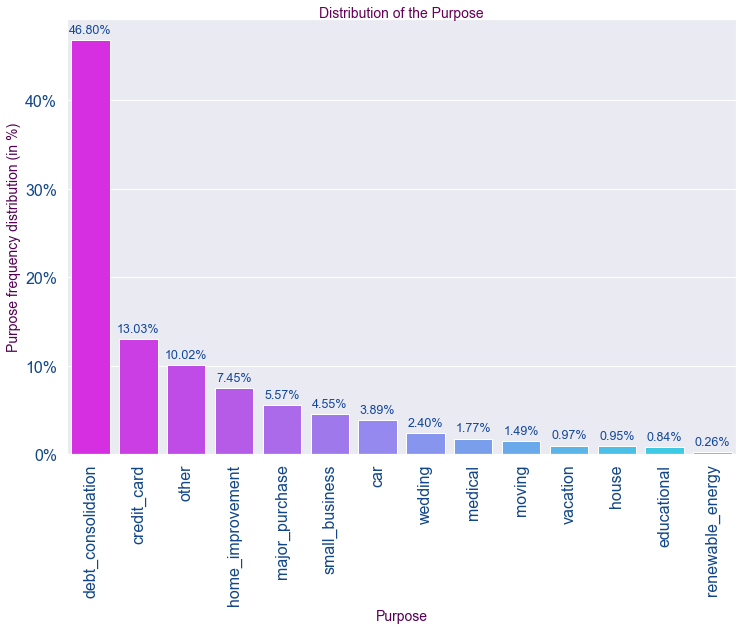

In [112]:
# Plot normalized frequency distribution for Purpose
plot_box_or_bar_plot(data=purpose_dist,
                     x='purpose',
                     y='normalized_frequency_distribution',
                     xlabel='Purpose',
                     ylabel='Purpose frequency distribution (in %)', 
                     title='Distribution of the Purpose', 
                     xroataion=90,
                     yticks=[[0,10,20,30,40],['0%','10%','20%','30%','40%']],
                     plot=1,
                     figsize=(12,8),
                     ticksFont_size=16,
                     annoteSize=12.5)

In [113]:
# Create normalized frequency distribution of purpose w.r.t loan_status
# loan_status=0 (fully paid) & loan_status=1 (charged-off)

purpose_dist_group = get_group_frequency_dist(loan_df,['purpose'],'loan_status')
purpose_dist_group

,purpose,loan_status,normalized_frequency_distribution
0,car,0,89.33
1,car,1,10.67
2,credit_card,0,89.22
3,credit_card,1,10.78
4,debt_consolidation,0,84.67
5,debt_consolidation,1,15.33
6,educational,0,82.77
7,educational,1,17.23
8,home_improvement,0,87.93
9,home_improvement,1,12.07


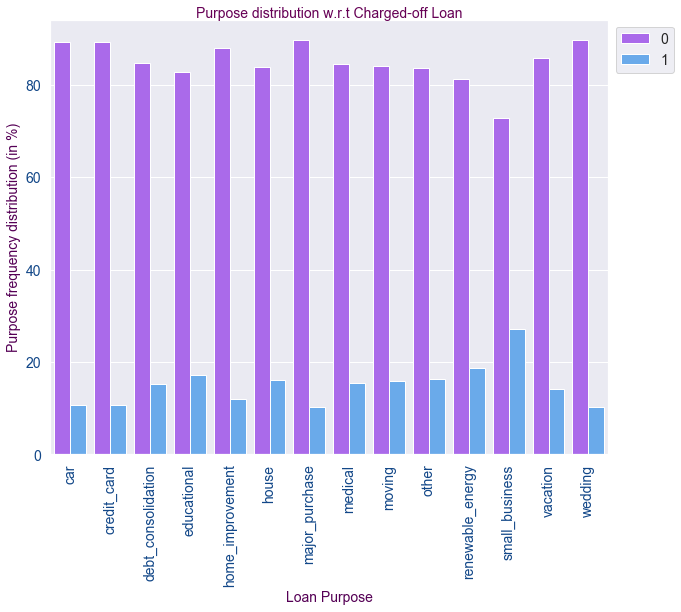

In [114]:
# Plot the relationship between purpose & loan_status 
# loan_status = 0 (fully paid) & loan_status = 1 (charged-off)
# Applicants with Loan for educationa or small bussiness purposes are more likely not to repay the loan
# We can clearly observe that small bussiness loan purpose has the higest charged-off frequency 

plot_box_or_bar_plot(x='purpose',
                     y='normalized_frequency_distribution',
                     data=purpose_dist_group,
                     hue='loan_status',
                     plot=1,
                     xlabel='Loan Purpose',
                     ylabel='Purpose frequency distribution (in %)',
                     ticksFont_size=14,
                     title='Purpose distribution w.r.t Charged-off Loan',
                     xroataion=90,
                     annotate=False,
                     have_legend=True,
                     bbox_to_anchor=(1.13,1))

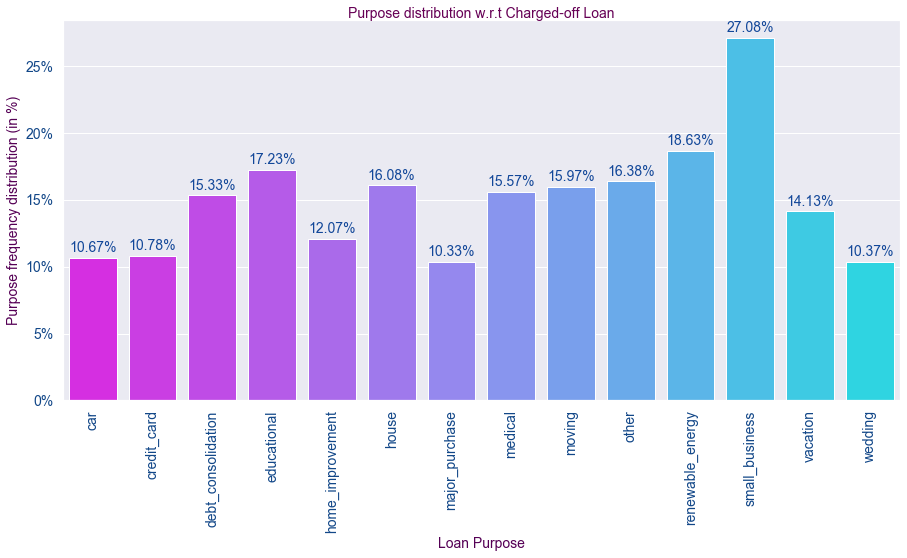

In [115]:
# Plot the relationship between purpose & loan_status  where loan_status = 1 (charge-off)
# Below plot shows defaulting on for small business is twice the high than defaulting on loan for car 
# Similarly loan for renewable energy and educational purposes have high charged-off rate than other like for wedding
# Based on the evidence we have, we can flag small bussiness, renewable energy and educational purpos as high risks for business
# We would perform segmented univariate analysis for this to see if there are other factors combined with this which causes loan default

plot_box_or_bar_plot(x='purpose',
                     y='normalized_frequency_distribution',
                     data=purpose_dist_group.loc[(purpose_dist_group['loan_status'] == 1 )],
                     plot=1,
                     figsize=(15,7),
                     xlabel='Loan Purpose',
                     ylabel='Purpose frequency distribution (in %)',
                     ticksFont_size=14,
                     title='Purpose distribution w.r.t Charged-off Loan',
                     yticks = [[0,5,10,15,20,25],['0%','5%','10%','15%','20%','25%']],
                     xroataion=90,
                     annotate=True,
                    annoteSize=14)

In our analysis of loan Purpose we found that loan purpose is a driving variable for identifying risky loan applicants, we have observed and concluded based on data & facts that Small business are highly likely to default on their loan followed by Renewable energy and Educational purpose loan.

#### CAT-14::15 -> zip_code & addr_state

In [116]:
# let's first check in metadata dictionary
# No missing values
# There are 823 unique values
# Most frequent unique value '100xx' frequency count percent is approx 1.5%
metadata_df.loc['zip_code']

Description                        The first 3 numbers of the zip code provided b...
dtype                                                                         object
uniques                                                                          823
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                  100xx
most_frequent_col_count_percent                                                 1.5%
Name: zip_code, dtype: object

In [117]:
# Get normalized frequency distribution for zip_code
# The top 3 zip code constitutes less than 5% of the total which is very near to being lamost all unique
# Due to spread, it would not add anything concrete to our analysis
zip_code_dist = get_frequency_distribution(loan_df,'zip_code')
zip_code_dist.normalized_frequency_distribution.nlargest(3)

0    1.51
1    1.38
2    1.30
Name: normalized_frequency_distribution, dtype: float64

In [118]:
# Drop zip_code
# We will see if state can be utilised or not
loan_df.drop('zip_code',1, inplace=True)

In [119]:
# let's first check in metadata dictionary
# No missing values
# There are 50 unique values
# Most frequent unique value 'CA' frequency count percent is approx 17.87%
metadata_df.loc['addr_state']

Description                        The state provided by the borrower in the loan...
dtype                                                                         object
uniques                                                                           50
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                     CA
most_frequent_col_count_percent                                               17.87%
Name: addr_state, dtype: object

In [120]:
# Get normalized frequency distribution for addr_state
# Top 3 state constitutes almost 35% of total records
addr_state_dist = get_frequency_distribution(loan_df,'addr_state')
addr_state_dist.normalized_frequency_distribution.nlargest(3)

0    18.01
1     9.59
2     7.21
Name: normalized_frequency_distribution, dtype: float64

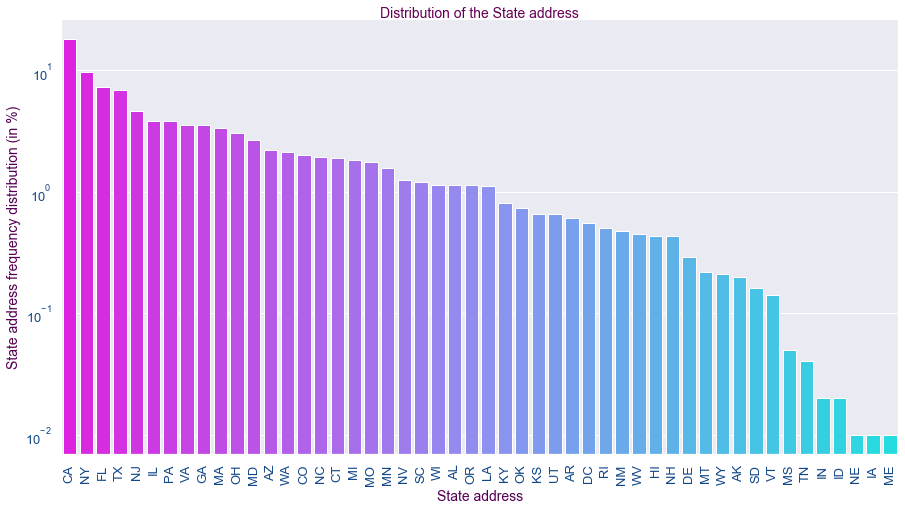

In [121]:
# Plot normalized frequency distribution for addr_state
#Highest number of loan applicants from CA
plot_box_or_bar_plot(data=addr_state_dist,
                     x='addr_state',
                     y='normalized_frequency_distribution',
                     xlabel='State address',
                     ylabel='State address frequency distribution (in %)', 
                     title='Distribution of the State address', 
                     xroataion=90,
                     ylog=True,
                     plot=1,
                     figsize=(15,8),
                     ticksFont_size=13,
                     annotate=False)

In [122]:
# Create normalized frequency distribution of state address for charged-odd laons (loan_status = 1)
# State with state code NE have very high charged-off rate (60%)
# Out of each 100 applicants from NE on average 60 applicants default on their loan
# For bussiness loan application from NE state poses very high risk for loan default.

addr_state_dist_group = get_group_frequency_dist(loan_df,['addr_state'],'loan_status')
addr_state_dist_group = addr_state_dist_group.loc[(addr_state_dist_group['loan_status'] == 1 )]
addr_state_dist_group.sort_values(by='normalized_frequency_distribution',ascending=False)

,addr_state,loan_status,normalized_frequency_distribution
53,NE,1,60.00
62,NV,1,22.55
78,SD,1,19.35
1,AK,1,19.23
19,FL,1,18.12
46,MO,1,17.01
23,HI,1,16.87
26,ID,1,16.67
60,NM,1,16.39
70,OR,1,16.32


In [123]:
# Let's find out average loan default frequency for across the states
# Average cherged-off rate is approx 15%
# Increase in Standard Deviation is due to certain outliers we have as we can see the max value is 60
addr_state_dist_group.normalized_frequency_distribution.describe()

count    47.000000
mean     15.005957
std       7.332764
min       5.000000
25%      12.335000
50%      13.940000
75%      15.855000
max      60.000000
Name: normalized_frequency_distribution, dtype: float64

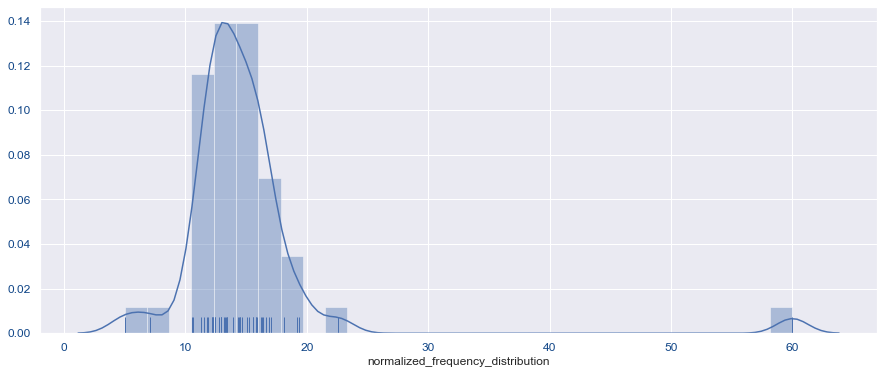

In [124]:
# Let's plot the density distribution of the state over charged-off loan i.e loan_status = 1
# From plot too we can observe the right skewness in state distribution because of the few outliers
plot_dist_plot(addr_state_dist_group.normalized_frequency_distribution,rug=True)

In [125]:
# We have seen that average normalized  frequency for state address is approx 15 for charged-off loan
# Let's find out the extreme range for state address frequency out of which we can flag as outlier

# let's get the percentiles
addr_state_percetiles = np.percentile(addr_state_dist_group.normalized_frequency_distribution,[25,50,75,90])

# calculate the iqr
iqr = addr_state_percetiles[2] - addr_state_percetiles[0]
# 1.5 iqr is the higest upper permicible range 
extreme = round(addr_state_percetiles[2] + (1.5*iqr))

# so, we can ignore till 21
# Now from below plot let's see which states frequency crosses the upper boundary
extreme

21.0

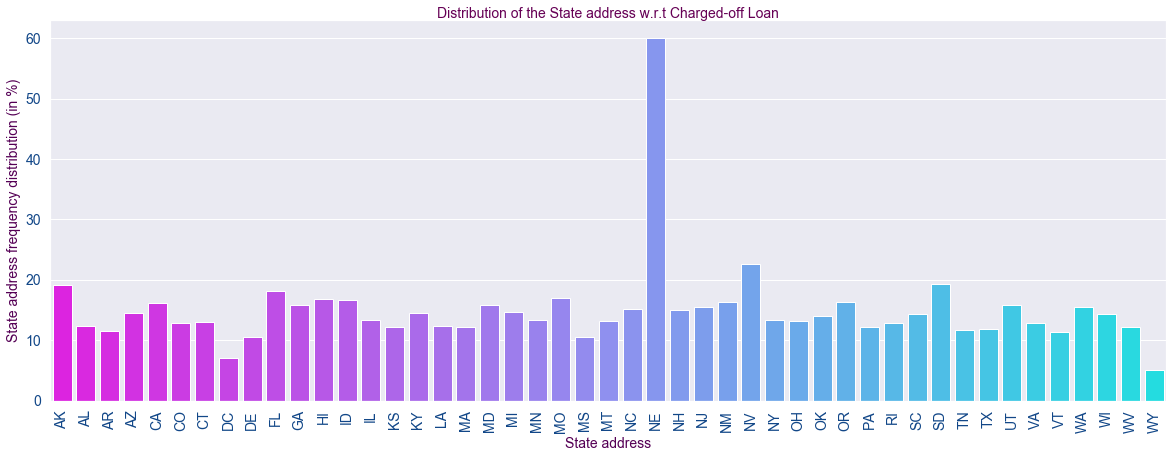

In [126]:
# Plot the relationship between state address and charged-off loan (loan_status = 1)
# We have found 21 as upper limit, from the plot we can observe state with state code NV & NE crosses the upper limit
# State with state code NE have very high charged-off rate (60%)

# Applicants from states NE & NV are highly unlikely to repay the loan, these states loan applicants poses
# high loan default risk
plot_box_or_bar_plot(x='addr_state',
                     y='normalized_frequency_distribution',
                     data=addr_state_dist_group,
                     plot=1,
                     figsize=(20,7),
                     xlabel='State address',
                     ylabel='State address frequency distribution (in %)',
                     ticksFont_size=14,
                     title='Distribution of the State address w.r.t Charged-off Loan',
                     annotate=False,
                     xroataion=90)

We have found that NV and NE states applicants have hiigh charged-off rate among all the states loan applicatns, let's see the interest rate variations for different states.

In [127]:
# Get the average interest rate for state address in case of charged-off loans
state_addr_int_rate = loan_df.loc[(loan_df['loan_status']==1)].groupby('addr_state')['int_rate'].mean().sort_values(ascending=False)
state_addr_int_rate

addr_state
WY    16.507500
AK    15.456000
UT    15.205750
AL    14.615370
MD    14.478704
OH    14.417290
MT    14.396364
WI    14.379206
DC    14.308667
TX    14.299399
VA    14.257288
OR    14.204930
NV    14.169907
CT    14.109255
KY    14.070889
SC    14.063485
HI    13.982500
MI    13.964466
NC    13.914825
NJ    13.884964
NY    13.846848
MA    13.783333
CA    13.766880
AZ    13.728699
IL    13.714213
AR    13.700000
CO    13.690918
WA    13.627244
OK    13.579750
FL    13.520615
MS    13.515000
GA    13.490512
SD    13.454167
MO    13.452632
PA    13.441222
VT    13.431667
RI    13.363600
ID    13.300000
MN    13.197901
DE    13.099167
LA    12.763585
NH    12.635600
WV    12.454762
KS    12.088710
NM    12.062333
NE    11.746667
TN    11.340000
Name: int_rate, dtype: float64

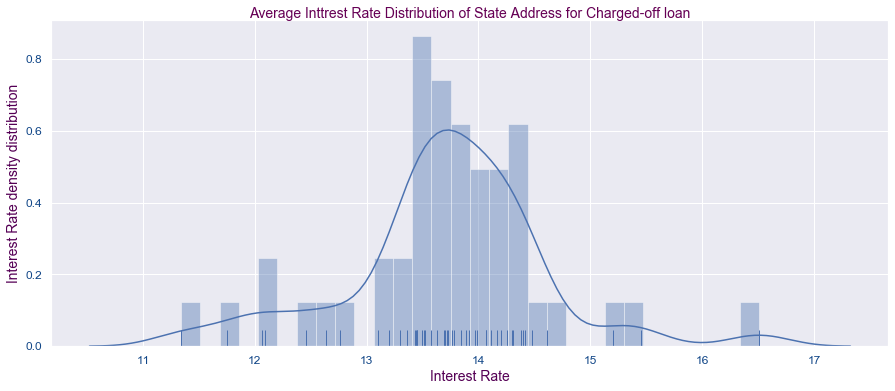

In [128]:
# There is not much difference in the average interest rates variation accross the states
# It is not evident that average interest rates vbary highly accros the states
# the denity is concentrated between mostly between 13 $ 15 % interest rate.

# So, high interest rate can't be the reason behind the high charged-off rate for the state (NE & NV) we found above.
plot_dist_plot(state_addr_int_rate,
               rug=True,
               xlabel='Interest Rate',
               ylabel='Interest Rate density distribution',
               title='Average Inttrest Rate Distribution of State Address for Charged-off loan'  )

We have observed in our analysis that the loans from Nevada & most of the loans from Nebraska state have high probability to default. Applicants from these two states poses greater risk for loan default and are highly unlikely to repay their loan. We found <b>STATE</b> as strong driving variable for loan default (charged-off loan)

#### CAT-16: earliest_cr_line

In [129]:
# let's first check in metadata dictionary
# it doesn't have missing values 
# There are 526 unique values
# Most frequent unique value Nov-98 frequency count percent is just approx 0.93%
print(metadata_df.loc['earliest_cr_line'])
metadata_df.loc['earliest_cr_line']['Description'].upper()

Description                        The month the borrower's earliest reported cre...
dtype                                                                         object
uniques                                                                          526
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                 Nov-98
most_frequent_col_count_percent                                                0.93%
Name: earliest_cr_line, dtype: object


"THE MONTH THE BORROWER'S EARLIEST REPORTED CREDIT LINE WAS OPENED"

In [130]:
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)

In [131]:
# Let's check distribution based on year part of earliest_cr_line
# top 3 have almost same distribution
100*loan_df['earliest_cr_line'].dt.year.value_counts(True)

2000    8.191409
1999    7.507064
1998    7.188221
2001    6.382041
1997    6.187625
1996    5.708064
1995    5.386629
1994    5.049641
2002    4.899292
2003    4.699692
2004    4.476761
2005    3.802784
1993    3.784639
2006    2.991420
1992    2.667392
1990    2.605179
1991    2.449646
1989    2.161910
1988    1.837883
2007    1.809368
1987    1.529409
1986    1.239080
1985    1.137984
1984    1.023926
1983    0.834694
1982    0.557327
1981    0.469191
1980    0.453638
1978    0.417347
1979    0.406978
2008    0.396609
1977    0.290328
1976    0.241076
1975    0.215154
1974    0.160718
1973    0.158125
1972    0.127019
1970    0.121834
1971    0.116650
1969    0.095912
2068    0.049252
2067    0.046660
2066    0.028514
2063    0.025922
2065    0.020738
2064    0.015553
2062    0.012961
2054    0.005184
2061    0.005184
2056    0.002592
2046    0.002592
2050    0.002592
2059    0.002592
Name: earliest_cr_line, dtype: float64

In [132]:
# Let's check distribution based on month part of earliest_cr_line
# top 3 have almost same distribution here too 
100*loan_df['earliest_cr_line'].dt.month.value_counts(True)

10    10.283329
12    10.241854
11     9.878943
9      9.085725
1      8.634679
8      8.328797
7      7.691111
6      7.421521
5      7.323016
2      7.214143
3      7.037872
4      6.859009
Name: earliest_cr_line, dtype: float64

In [133]:
# let's drop this variable, we have seen that there are a lot spread in the data and there are no clear patterns
loan_df.drop('earliest_cr_line',1,inplace=True)

In our analysis of <b> EARLIEST REPORTED CREDIT LINE </b> we haven't found it as strong driving variable for loan default hence we will not suggest this as a measure for the identification of risky loan applicants.

#### CAT-17: revol_util

In [134]:
# let's first check in metadata dictionary
# 50 missing values (minimal amount, approx 0.1%)
# There are 1089 unique values
# Most frequent unique value 0% Nov-98 frequency count percent is  approx 2.46%
print(metadata_df.loc['revol_util'])
metadata_df.loc['revol_util']['Description'].upper()

Description                        Revolving line utilization rate, or the amount...
dtype                                                                         object
uniques                                                                         1089
missing                                                                           50
all_count                                                                      39717
non_nulls                                                                      39667
missing_percent                                                                  0.1
is_unique                                                                      False
most_frequent                                                                     0%
most_frequent_col_count_percent                                                2.46%
Name: revol_util, dtype: object


'REVOLVING LINE UTILIZATION RATE, OR THE AMOUNT OF CREDIT THE BORROWER IS USING RELATIVE TO ALL AVAILABLE REVOLVING CREDIT.'

In [135]:
# Get the frequency distribution for revol_util
100 * loan_df['revol_util'].value_counts(True).nlargest(3)

0%       2.476186
0.20%    0.160926
63%      0.160926
Name: revol_util, dtype: float64

In [136]:
# Filter out the percent sign and get the actual float values
loan_df['revol_util'] = loan_df[loan_df['revol_util'].notnull()]['revol_util'].apply(lambda x:x.replace('%',''))
# Convert to float
loan_df['revol_util'] = loan_df['revol_util'].astype('float')
print(loan_df['revol_util'].isnull().sum())
print(loan_df['revol_util'].dtypes)

50
float64


In [137]:
# Get the summary statistics for revol_util
loan_df[loan_df['revol_util'].notnull()].revol_util.describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

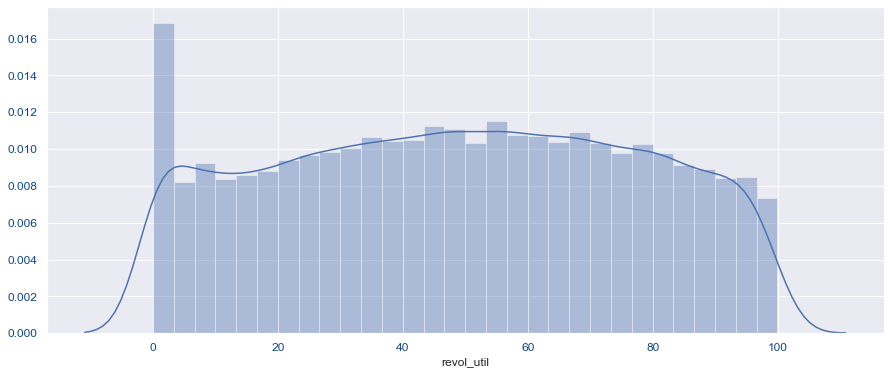

In [138]:
# Let's Plot the density distribution for revol_util
# Other than 0, most of the revol_util values have almost same probability density distribution
plot_dist_plot(loan_df[loan_df['revol_util'].notnull()].revol_util)

##### Analyse Relationship between revol_util & loan_status
- Let's find out whether revol_util have any impact on loan default
- Shoul bussiness consider revol_util in their decisions for acceptance or rejection of loan to applicant
- Do we have a clear pattern with revol_util which can be driving loan default

In [139]:
# Let's find the summary statistics for revol_util based on loan_status
# Average revol_util for charged-off loan is higher 
loan_df.groupby('loan_status')['revol_util']. describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32916.0,47.531801,28.276743,0.0,23.9,47.6,70.8,99.9
1,5611.0,55.572110,27.905282,0.0,34.4,58.4,79.0,99.9


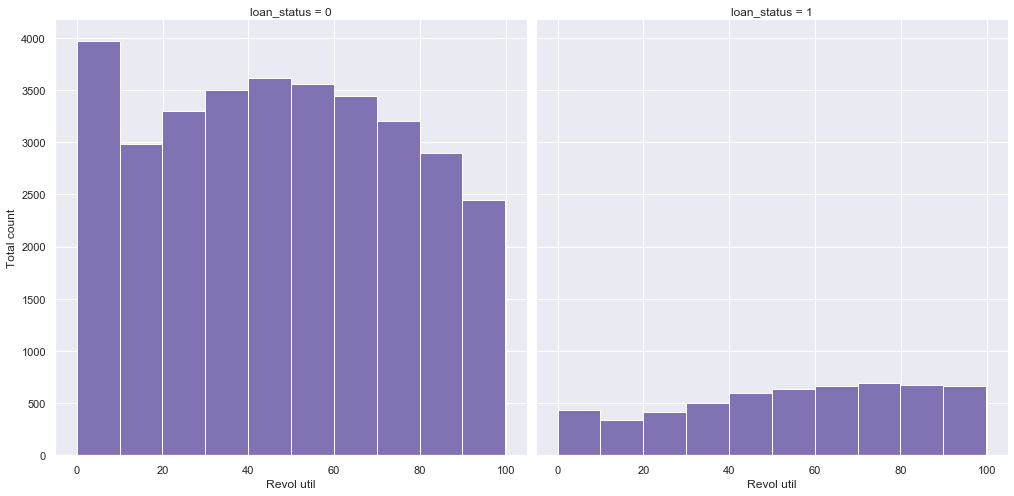

In [140]:
# Plot the revol_util count distribution w.r.t loan_status
# loan_status=0 (fully paid) & loan_status=1 (cheraged-off)

g = sns.FacetGrid(loan_df, col="loan_status",height=7,aspect=1 )
g = g.map(plt.hist, "revol_util", bins=10, color="m" )

g.set_axis_labels('Revol util','Total count');

g.fig.subplots_adjust(wspace=.02, hspace=.02);

In [141]:
# Group loan_df on revol_util and get the distribution w.r.t loan_status
revol_util_default_group = get_group_frequency_dist(loan_df,['revol_util'],'loan_status')
revol_util_default_group

,revol_util,loan_status,normalized_frequency_distribution
0,0.00,0,84.91
1,0.00,1,15.09
2,0.01,0,100.00
3,0.03,0,100.00
4,0.04,0,100.00
...,...,...,...
2071,99.70,1,3.33
2072,99.80,0,73.91
2073,99.80,1,26.09
2074,99.90,0,64.00


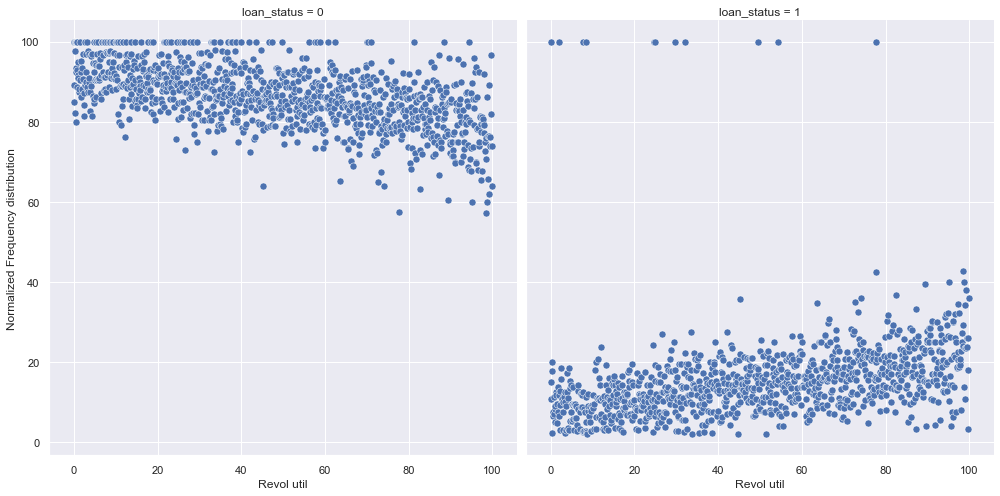

In [142]:
# Plot the relationship between revol util and loan status
# We can observe few outliers, but overall the data is fairly concentrated
# Based on our analysis for revol_util, we don't find it as driving factor for charged-off loan

kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(revol_util_default_group, col="loan_status", palette="Set1", height=7, aspect=1)
g = (g.map(plt.scatter, "revol_util", "normalized_frequency_distribution", **kws))
g.set_axis_labels('Revol util','Normalized Frequency distribution');
g.fig.subplots_adjust(wspace=.02, hspace=.02);


In [143]:
# As final step, let's also check correlation beween revol_util and loan_status
# We have correlation of 0.09 which doesn't support strong correlation between these two 
loan_df.loc[:,['revol_util','loan_status']].corr()

,revol_util,loan_status
revol_util,1.00000,0.09999
loan_status,0.09999,1.00000


In [144]:
# We found that revol_util is not having significant impact on loan default
# Let's drop revol_util
loan_df.drop('revol_util',1,inplace=True)

In our analysis of <b>REVOLVING LINE UTILIZATION RATE</b> we haven't found it as strong driving variable for loan default hence we will not suggest this as a measure for the identification of risky loan applicants

#### CAT-18: last_pymnt_d

In [145]:
print(metadata_df.loc['last_pymnt_d'])
metadata_df.loc['last_pymnt_d']['Description'].upper()

Description                        Last month payment was received
dtype                                                       object
uniques                                                        101
missing                                                         71
all_count                                                    39717
non_nulls                                                    39646
missing_percent                                                0.2
is_unique                                                    False
most_frequent                                               May-16
most_frequent_col_count_percent                              3.16%
Name: last_pymnt_d, dtype: object


'LAST MONTH PAYMENT WAS RECEIVED'

In [146]:
# We do observe records after the timeframe mentioned in the problem statement which said the following
loan_df['last_pymnt_d']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
5        Jan-15
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 38577, dtype: object

In [147]:
# Let's analyse how many records are a part of 2007-2011 timeframe
# This function creates a subset and builds a derived column as year to perform further analysis
# We will need to verify this analysis
def analyse_year_for_date_col(loan_df, col):
    credit_pull_df = pd.DataFrame(loan_df[col]).astype(str).dropna()
    credit_pull_df = credit_pull_df[~(credit_pull_df[col]=='nan')]
    credit_pull_df['year'] = credit_pull_df[col].apply(lambda x: x.split('-')[-1]).astype(int)
    credit_pull_df['year'] = credit_pull_df['year'].astype(int)
    analysed_df = credit_pull_df[credit_pull_df['year'].between(7,11)]
    print("Only", analysed_df.shape[0], "number of records from",
          credit_pull_df.shape[0], "are in the range 2007-2011")

In [148]:
analyse_year_for_date_col(loan_df, 'last_pymnt_d')

Only 7540 number of records from 38506 are in the range 2007-2011


In [149]:
loan_df.drop('last_pymnt_d',1,inplace=True)

In our analysis of <b>LAST MONTH PAYMENT</b> we haven't found it as strong driving variable for loan default hence we will not suggest this as a measure for the identification of risky loan applicants

#### CAT-19: last_credit_pull_d

In [150]:
print(metadata_df.loc['last_credit_pull_d'])
metadata_df.loc['last_credit_pull_d']['Description'].upper()

Description                        The most recent month LC pulled credit for thi...
dtype                                                                         object
uniques                                                                          106
missing                                                                            2
all_count                                                                      39717
non_nulls                                                                      39715
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                 May-16
most_frequent_col_count_percent                                               25.95%
Name: last_credit_pull_d, dtype: object


'THE MOST RECENT MONTH LC PULLED CREDIT FOR THIS LOAN'

In [151]:
# We do observe records after the timeframe mentioned in the problem statement which said the following
# It contains the complete loan data for all loans issued through the time period 2007 t0 2011.
# ToDo: Is it true??
loan_df['last_credit_pull_d']

0        May-16
1        Sep-13
2        May-16
3        Apr-16
5        Jan-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 38577, dtype: object

In [152]:
analyse_year_for_date_col(loan_df, 'last_credit_pull_d')

Only 3344 number of records from 38575 are in the range 2007-2011


In [153]:
loan_df.drop('last_credit_pull_d',1,inplace=True)

In our analysis of <b>THE MOST RECENT MONTH LC PULLED CREDIT</b> we haven't found it as strong driving variable for loan default hence we will not suggest this as a measure for the identification of risky loan applicants

In [154]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year'],
      dtype='object')

### EDA Quantitative Columns

##### Analyse loan_df_quantitative
   - Till now we have done analysis on categorical variables, let's start with numerical one's
   - The ultimate goal is to find the driving variables for loan default 
   - We will use different eda techniques to derive fact and data supported conclusion for loan default
    

In [155]:
# Let's first check the basic details of loan_df_quantitative dataframe
get_basic_details(loan_df_quantitative)

Shape of dataset
(38577, 22)

Number of Observations in dataset
848694

Basic Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
installment                38577 non-null float64
annual_inc                 38577 non-null float64
loan_status                38577 non-null int64
dti                        38577 non-null float64
delinq_2yrs                38577 non-null int64
inq_last_6mths             38577 non-null int64
open_acc                   38577 non-null int64
pub_rec                    38577 non-null int64
revol_bal                  38577 non-null int64
total_acc                  38577 non-null int64
total_pymnt                38577 non-null float64
total_pymnt_inv            38577 non-null float64
total_rec_prncp            38577 non-null float64
total_rec_int             

#### Correlation (Quantitative Columns)

In [156]:
# let's check the linear correlation between loan_df_quantitative variables
cor = loan_df_quantitative.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000,0.982,0.938,0.932,0.269,0.059,0.062,-0.032,0.013,0.177,...,0.256,0.882,0.848,0.846,0.728,0.047,0.143,0.077,0.475,-0.036
funded_amnt,0.982,1.000,0.956,0.958,0.265,0.056,0.062,-0.032,0.013,0.176,...,0.251,0.899,0.865,0.864,0.737,0.049,0.143,0.079,0.478,-0.037
funded_amnt_inv,0.938,0.956,1.000,0.905,0.252,0.038,0.071,-0.038,-0.003,0.163,...,0.243,0.875,0.909,0.839,0.727,0.029,0.131,0.064,0.469,-0.041
installment,0.932,0.958,0.905,1.000,0.268,0.027,0.052,-0.020,0.011,0.173,...,0.230,0.858,0.818,0.848,0.643,0.058,0.121,0.078,0.414,-0.033
annual_inc,0.269,0.265,0.252,0.268,1.000,-0.041,-0.122,0.022,0.035,0.157,...,0.235,0.256,0.245,0.257,0.185,0.007,0.022,0.016,0.143,-0.016
loan_status,0.059,0.056,0.038,0.027,-0.041,1.000,0.045,0.020,0.072,-0.009,...,-0.023,-0.236,-0.233,-0.335,0.013,0.165,0.340,0.205,-0.223,0.048
dti,0.062,0.062,0.071,0.052,-0.122,0.045,1.000,-0.033,0.002,0.288,...,0.229,0.059,0.066,0.037,0.103,-0.011,0.026,0.012,0.009,0.006
delinq_2yrs,-0.032,-0.032,-0.038,-0.020,0.022,0.020,-0.033,1.000,0.009,0.012,...,0.067,-0.023,-0.030,-0.038,0.024,0.029,0.012,0.014,-0.013,0.003
inq_last_6mths,0.013,0.013,-0.003,0.011,0.035,0.072,0.002,0.009,1.000,0.093,...,0.114,-0.008,-0.019,-0.021,0.027,0.031,0.019,0.012,0.028,0.016
open_acc,0.177,0.176,0.163,0.173,0.157,-0.009,0.288,0.012,0.093,1.000,...,0.687,0.162,0.152,0.160,0.123,-0.019,0.017,0.007,0.082,0.006


In [157]:
# From the below heatmap plot, we can observe the cluster of highly correlated variables
# like one patch we can observe is off loan_amnt, funded amnt, funded_amnt_inv & installment, these 4 have very high positive
# correlation among each other, this shows that these are highly likely to move together like increase in loan_amnt tends to be 
# show increase in installment as well and vice versa.
corr = loan_df_quantitative.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1,0.98179,0.937922,0.93226,0.268999,0.0594626,0.0624358,-0.0319515,0.01294,0.1772,-0.0499975,0.314022,0.256179,0.88191,0.847635,0.84587,0.728343,0.0471028,0.142789,0.077005,0.474614,-0.0359812
funded_amnt,0.98179,1,0.956172,0.958035,0.264798,0.0564973,0.0621941,-0.0318661,0.0128569,0.175682,-0.0505762,0.306501,0.250551,0.898709,0.864501,0.864082,0.736654,0.0494652,0.143452,0.0787694,0.478448,-0.036995
funded_amnt_inv,0.937922,0.956172,1,0.905464,0.251981,0.037781,0.070663,-0.0381712,-0.00280027,0.162738,-0.0514702,0.286265,0.242715,0.87473,0.909127,0.838587,0.726736,0.0293791,0.130997,0.0642816,0.469166,-0.0411932
installment,0.93226,0.958035,0.905464,1,0.267842,0.0271529,0.0520385,-0.0197554,0.0110144,0.172893,-0.0457055,0.309501,0.22986,0.858493,0.817665,0.847762,0.642655,0.0583866,0.121463,0.0775189,0.413588,-0.0333606
annual_inc,0.268999,0.264798,0.251981,0.267842,1,-0.0408672,-0.12153,0.0222289,0.0354651,0.156927,-0.017864,0.277374,0.234534,0.256313,0.245198,0.256848,0.185056,0.00681447,0.0221839,0.0159814,0.143242,-0.0162235
loan_status,0.0594626,0.0564973,0.037781,0.0271529,-0.0408672,1,0.0450777,0.0200958,0.0718778,-0.00914023,0.051001,0.00585386,-0.0226076,-0.235898,-0.232906,-0.334944,0.0130083,0.165115,0.339562,0.204914,-0.222524,0.0477573
dti,0.0624358,0.0621941,0.070663,0.0520385,-0.12153,0.0450777,1,-0.033347,0.00217837,0.287849,-0.00474244,0.22809,0.229119,0.0592738,0.0662768,0.0367551,0.103104,-0.0114121,0.0261624,0.0117436,0.00856619,0.00596645
delinq_2yrs,-0.0319515,-0.0318661,-0.0381712,-0.0197554,0.0222289,0.0200958,-0.033347,1,0.00873341,0.0116486,0.00762299,-0.0544373,0.0669943,-0.0231298,-0.029608,-0.0384471,0.0237777,0.028772,0.0124425,0.0140772,-0.0125112,0.00340418
inq_last_6mths,0.01294,0.0128569,-0.00280027,0.0110144,0.0354651,0.0718778,0.00217837,0.00873341,1,0.0934343,0.0237263,-0.020787,0.113516,-0.0082439,-0.0185889,-0.0213279,0.0265492,0.0307406,0.0188992,0.0123878,0.0277724,0.0155171
open_acc,0.1772,0.175682,0.162738,0.172893,0.156927,-0.00914023,0.287849,0.0116486,0.0934343,1,2.83629e-05,0.288055,0.68726,0.162141,0.152008,0.159997,0.123478,-0.0188274,0.0172413,0.00667418,0.0823964,0.00580316


##### As we have observed that few variables are highly correlated among themselves hence we can minimise the scope of our analysis by picking one of the variables from the set of correlated variables

In [158]:
# This function will retrurn the set of correlated variables based on positive and negative thresh between -1 to 1

def get_higly_correlated_columns_name(row, positive=0.8, negative=-0.8):
    corr_col_arr = []
    for col in row.index.values:
        if row[col] >= positive or row[col] <= negative:
            corr_col_arr.append(col)
    return  corr_col_arr 
            

def get_higly_correlated_columns_value(row,positive=0.8, negative=-0.8):
    corr_col_val_arr = []
    for col in row.index.values:
        if row[col] >= positive or row[col] <= negative:
            corr_col_val_arr.append(str(round(row[col],2)))
    return  corr_col_val_arr
            


In [159]:
# create correlated column combination
cor_new = cor.copy()
cor_new['cor_columns'] = cor_new.apply(lambda x : get_higly_correlated_columns_name(x, 0.9, -0.9),axis=1)
cor_new['cor_columns_val'] = cor_new.iloc[:,:-1].apply(lambda x : get_higly_correlated_columns_value(x, 0.9, -0.9), axis=1)

cor_new = cor_new.iloc[:, -2:]
cor_new

,cor_columns,cor_columns_val
loan_amnt,"[loan_amnt, funded_amnt, funded_amnt_inv, inst...","[1.0, 0.98, 0.94, 0.93]"
funded_amnt,"[loan_amnt, funded_amnt, funded_amnt_inv, inst...","[0.98, 1.0, 0.96, 0.96]"
funded_amnt_inv,"[loan_amnt, funded_amnt, funded_amnt_inv, inst...","[0.94, 0.96, 1.0, 0.91, 0.91]"
installment,"[loan_amnt, funded_amnt, funded_amnt_inv, inst...","[0.93, 0.96, 0.91, 1.0]"
annual_inc,[annual_inc],[1.0]
loan_status,[loan_status],[1.0]
dti,[dti],[1.0]
delinq_2yrs,[delinq_2yrs],[1.0]
inq_last_6mths,[inq_last_6mths],[1.0]
open_acc,[open_acc],[1.0]


#### QUANT-1::4 ->  loan_amnt , funded_amnt & funded_amnt_inv & installment

In [160]:
loan_amnt_corr_cols = cor_new.loc['loan_amnt','cor_columns']
print(loan_amnt_corr_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment']


In [161]:
# Get the summary statistics
# We can observe the difference between mean and median which suggest these variables have outliers or skewness in data
# Standard Deviation is also very high for all the 4 variables
get_summary_statistics(loan_df[loan_amnt_corr_cols])


 Summary Statistics 


          loan_amnt   funded_amnt  funded_amnt_inv   installment
count  38577.000000  38577.000000     38577.000000  38577.000000
mean   11047.025430  10784.058506     10222.481123    322.466318
std     7348.441646   7090.306027      7022.720644    208.639215
min      500.000000    500.000000         0.000000     15.690000
25%     5300.000000   5200.000000      5000.000000    165.740000
50%     9600.000000   9550.000000      8733.440000    277.860000
75%    15000.000000  15000.000000     14000.000000    425.550000
max    35000.000000  35000.000000     35000.000000   1305.190000


In [162]:
# Get the metadata info for these 4
# We don't have missing values in any
# We can also observe all 4 of these variables are continuous variables
metadata_df.loc[loan_amnt_corr_cols]

,Description,dtype,uniques,missing,all_count,non_nulls,missing_percent,is_unique,most_frequent,most_frequent_col_count_percent
LoanStatNew,,,,,,,,,,
loan_amnt,The listed amount of the loan applied for by t...,int64,885,0,39717.0,39717.0,0.0,False,10000,7.13%
funded_amnt,The total amount committed to that loan at tha...,int64,1041,0,39717.0,39717.0,0.0,False,10000,6.9%
funded_amnt_inv,The total amount committed by investors for th...,float64,8205,0,39717.0,39717.0,0.0,False,5000,3.3%
installment,The monthly payment owed by the borrower if th...,float64,15383,0,39717.0,39717.0,0.0,False,311.11,0.17%


<Figure size 1080x504 with 0 Axes>

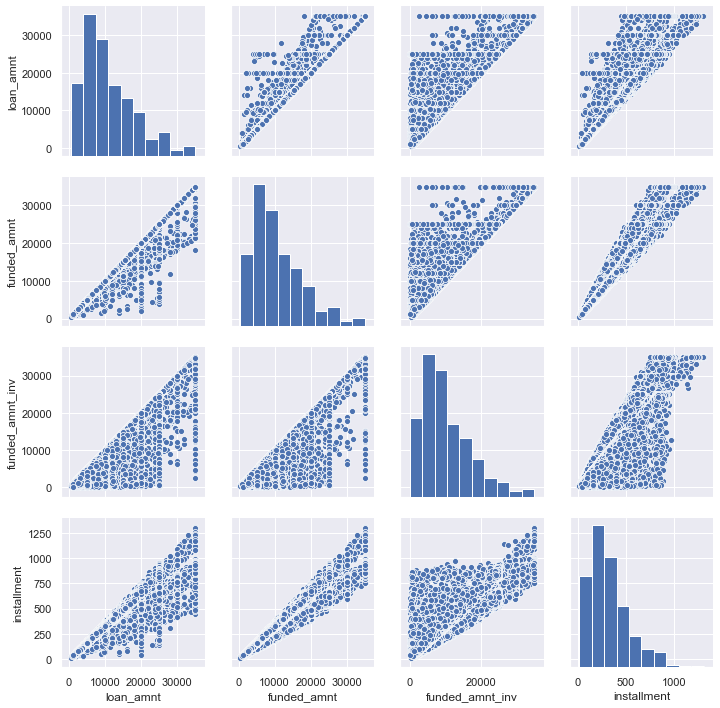

In [163]:
# Let's plot the pairwise plot which will help to verify the correlation and linearity between these 4 correlated variables
# We observe that there is almost perfect linear correlation among these variables as the data is distribute in almost
# similar fashion in all 4 of these variables
_ = plt.figure(figsize=(15,7))
_ = sns.pairplot(loan_df[loan_amnt_corr_cols])

In [164]:
# Let's find the correaltion of these 4 variables with loan_status
# We can observe that all the 4 variables have positive correlation with loan_status
# loan_amnt have the hoghest correlation among the these variables 
# As we analysed the linear relationship bewteen these 4 and also with loan_status
# We can keep loan_amnt for further analysis and drop others as all of these have similar impact on loan_default
loan_amnt_corr_cols.append('loan_status')
loan_df[loan_amnt_corr_cols].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,loan_status
loan_amnt,1.000000,0.981790,0.937922,0.932260,0.059463
funded_amnt,0.981790,1.000000,0.956172,0.958035,0.056497
funded_amnt_inv,0.937922,0.956172,1.000000,0.905464,0.037781
installment,0.932260,0.958035,0.905464,1.000000,0.027153
loan_status,0.059463,0.056497,0.037781,0.027153,1.000000


In [165]:
print(loan_df.shape)
loan_df.drop(['funded_amnt','funded_amnt_inv','installment'],1,inplace=True)
print(loan_df.shape)

(38577, 32)
(38577, 29)


#### Analysis on loan_amnt
    - Let's find out how loan_amnt affects loan_default
    - Find out signifiant patterns
    - should busisness consider loan_amnt as driving factor for charged-off loan

In [166]:
# let's first check loan_amnt in metadata dictionary
# it doesn't have any missing values 
# there are 885 unique values
# most frequent value is 10000 which constitutes approx 7.13% of total
print(metadata_df.loc['loan_amnt'][0])
metadata_df.loc['loan_amnt']

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


Description                        The listed amount of the loan applied for by t...
dtype                                                                          int64
uniques                                                                          885
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                  10000
most_frequent_col_count_percent                                                7.13%
Name: loan_amnt, dtype: object

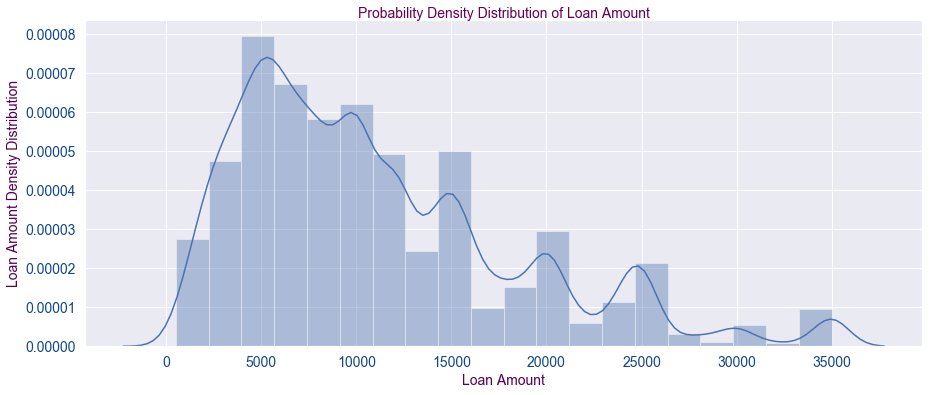

In [167]:
# Plot loan amount density distribution
# Most of the loan amount data fall in range of (5,000 - 10,000)
# We can clearly see the huge spread in the density distribution and the right skewness in the data
plot_dist_plot(loan_df['loan_amnt'],
               xlabel='Loan Amount',
               ylabel='Loan Amount Density Distribution',
               bins=20,
               title='Probability Density Distribution of Loan Amount',
               ticksFont_size=14)

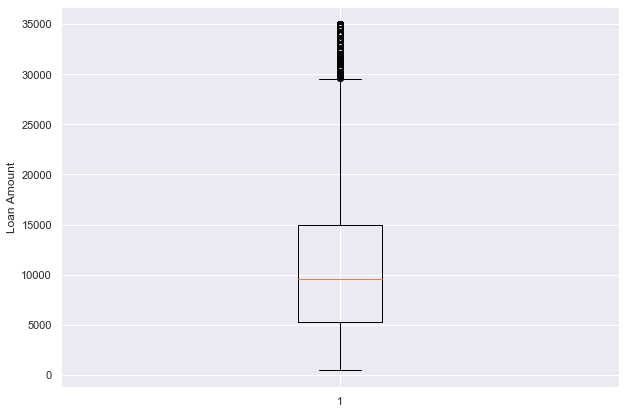

In [168]:
# The box plot clearly shows the presence of outliers above 1.5 IQR for loan_amnt
_ = plt.figure(figsize=(10,7))
_ = plt.boxplot(loan_df.loan_amnt)
_ = plt.ylabel('Loan Amount')

##### Analyse the loan amount distribution for fully paid and charged-off loan (loan_status=0 & loan_status=1)

In [169]:
# Get summary statistics for loan amount by loan status
# Average loan amount for charged-off loan is greater than the fully paid loan
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0
1,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0


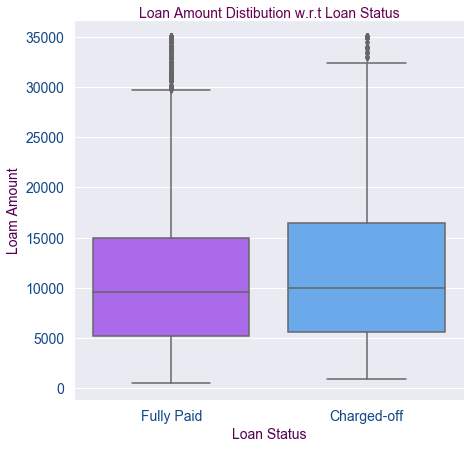

In [170]:
# Plot the summary staistics of loan_amnt w.r.t loan status
# Both distribution (based on loan status) have outliers presence
# Charged-off loan average amount is greater,also there are more datapoints above 50% (between q2 - q3) in charged-off loan amount
plot_box_or_bar_plot(y='loan_amnt',
                     x='loan_status',
                     data=loan_df,
                     figsize=(7,7),
                     xlabel='Loan Status',
                     ylabel='Loam Amount',
                     title = 'Loan Amount Distibution w.r.t Loan Status',
                     labelsFont_size=14,
                     xticks=[[0,1], ['Fully Paid','Charged-off']],
                     ticksFont_size=14)

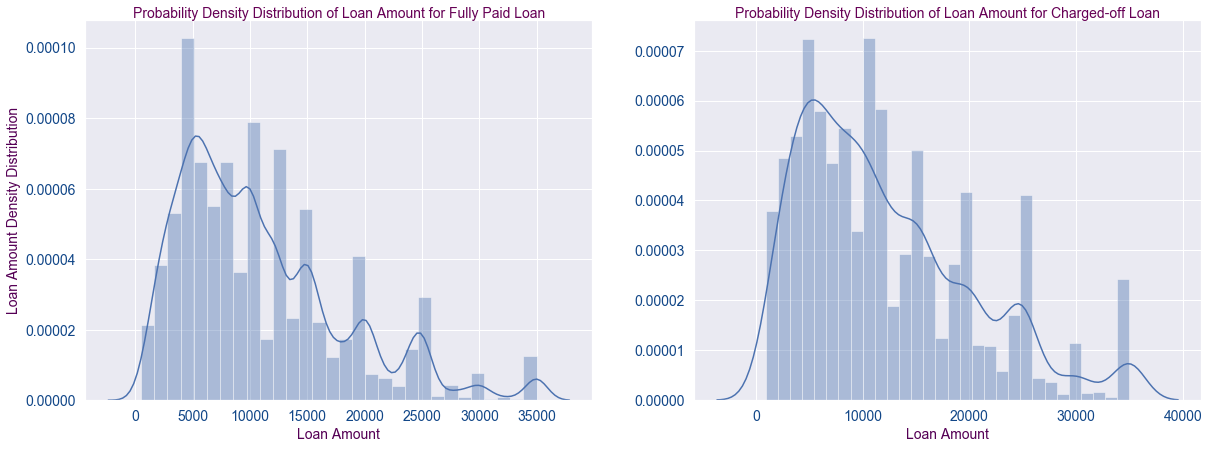

In [171]:
# Let's also plot the density distribution of loan amount for two loan statuses side by side
# We can observe that the density curve of loan amount for charged-off loan is wider at center 
# We can also observe the spike in loan default as the loan amount increases
 
_ = plt.figure(figsize=(20,7))
_ = plt.subplot(1,2,1)

plot_dist_plot(loan_df.loc[(loan_df['loan_status'] == 0),'loan_amnt'],
               plotfigure=False,
               bins=30,
               xlabel='Loan Amount',
               ylabel='Loan Amount Density Distribution',
               title='Probability Density Distribution of Loan Amount for Fully Paid Loan',
               ticksFont_size=14)

_ = plt.subplot(1,2,2)
plot_dist_plot(loan_df.loc[(loan_df['loan_status'] == 1),'loan_amnt'],
               plotfigure=False,
               bins=30,
               xlabel='Loan Amount',
               title='Probability Density Distribution of Loan Amount for Charged-off Loan',
               ticksFont_size=14)

We have found in our analysis that the <b>LOAN AMOUNT</b> have greater impact on Loan default, as the loan amount increases so is the likelihood of loan default, the average Loan amount for charged-off loan is higher than average loan amount for fully paid loan 

##### QUANT-5 -> annual_inc

In [172]:
# let's first check annual_inc in metadata dictionary
# it doesn't have missing values 
# There are 5318 unique values
# Most frequent unique value 60000 having frequency count percent is approx 3.97%
print(metadata_df.loc['annual_inc'][0])
metadata_df.loc['annual_inc']

The self-reported annual income provided by the borrower during registration.


Description                        The self-reported annual income provided by th...
dtype                                                                        float64
uniques                                                                         5318
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                  60000
most_frequent_col_count_percent                                                3.79%
Name: annual_inc, dtype: object

In [173]:
# The range i.e max - min is huge, standard deviation is almost equal to mean
# We will have to treat the outliers before moving ahead with analysis
print(loan_df['annual_inc'].describe().apply(lambda x: '%.2f' % x))

count      38577.00
mean       68777.97
std        64218.68
min         4000.00
25%        40000.00
50%        58868.00
75%        82000.00
max      6000000.00
Name: annual_inc, dtype: object


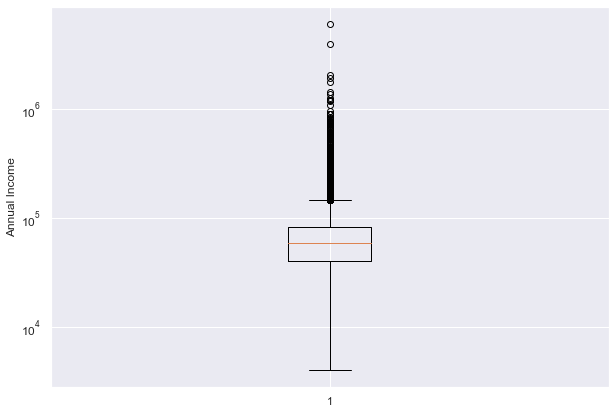

In [174]:
# The box plot clearly shows the presence of outliers above 1.5 IQR for loan_amnt
# There is huge spread in the annual income which we can observe from the plot below
_ = plt.figure(figsize=(10,7))
_ = plt.boxplot(loan_df.annual_inc)
_ = plt.yscale('log')
_ = plt.ylabel('Annual Income')
_ = plt.yticks(fontsize=12)

In [175]:
# Let's calculate the 25,50,75 & 90 percentile for annual income
ann_inc_perc = np.percentile(loan_df.annual_inc,[25,50,75,90])
ann_inc_perc

array([ 40000.,  58868.,  82000., 115000.])

In [176]:
# Let's calculate the upper limit for annual income for outlier treatment
annl_iqr = ann_inc_perc[2] - ann_inc_perc[0]
annl_extreme_upper = ann_inc_perc[2] + 1.5 * iqr
annl_extreme_upper

82005.28

In [177]:
# Remove the annual income above the upper limits
annl_inc_df = loan_df.loc[(loan_df.annual_inc <=145000)]
annl_inc_df.annual_inc.describe()

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64

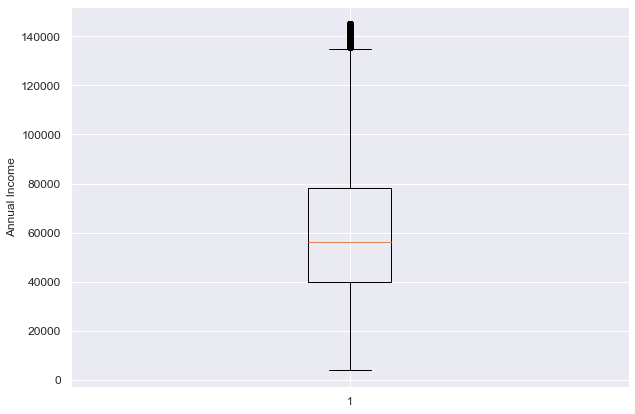

In [178]:
# We still have the outliers but now the the volume is not too huge
_ = plt.figure(figsize=(10,7))
_ = plt.boxplot(annl_inc_df.annual_inc)
_ = plt.ylabel('Annual Income')
_ = plt.yticks(fontsize=12)

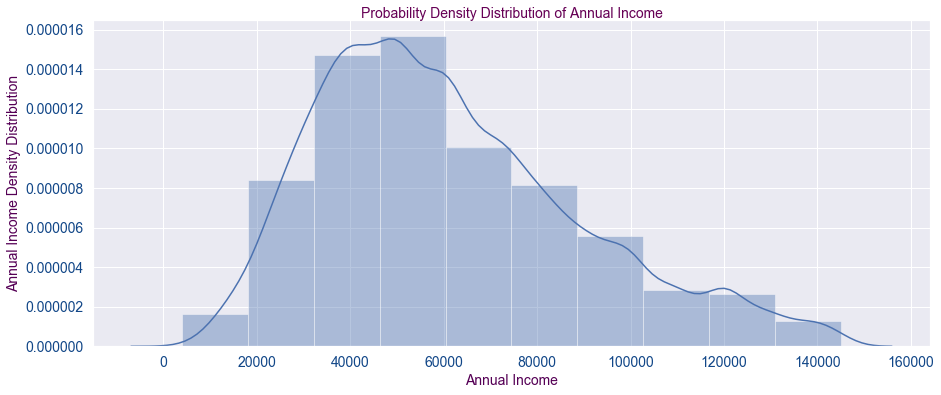

In [179]:
# Plot annual income density distribution
# Most of the annual income data fall in range of (4,000 - 6,000)
plot_dist_plot(annl_inc_df['annual_inc'],
               xlabel='Annual Income',
               ylabel='Annual Income Density Distribution',
               bins=10,
               title='Probability Density Distribution of Annual Income',
               ticksFont_size=14)

In [180]:
# Get summary statistics for annual income by loan status
# Average annual income for charged-off loan is lesser than the fully paid loan
annl_inc_df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,31384.0,62008.670381,28375.140167,4000.0,40000.0,57496.0,80000.0,145000.0
1,5431.0,56650.282105,26889.449133,4080.0,36400.0,51996.0,72000.0,145000.0


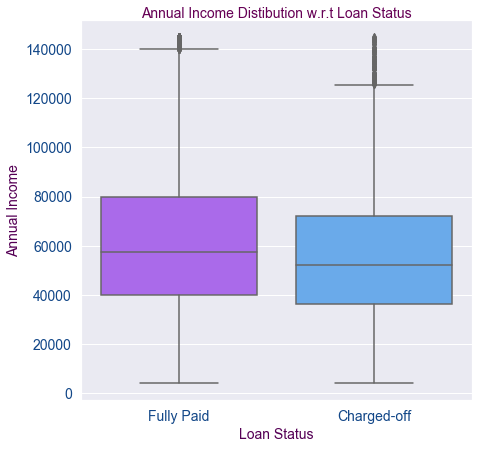

In [181]:
# Plot the summary staistics of annual income w.r.t loan status
# Below plot makes it clear that charged-off loan average annual income is lesser
# So lesser annual income have greater chances of defaulting or not repaying the loan
plot_box_or_bar_plot(y='annual_inc',
                     x='loan_status',
                     data=annl_inc_df,
                     figsize=(7,7),
                     xlabel='Loan Status',
                     ylabel='Annual Income',
                     title = 'Annual Income Distibution w.r.t Loan Status',
                     labelsFont_size=14,
                     xticks=[[0,1], ['Fully Paid','Charged-off']],
                     ticksFont_size=14)

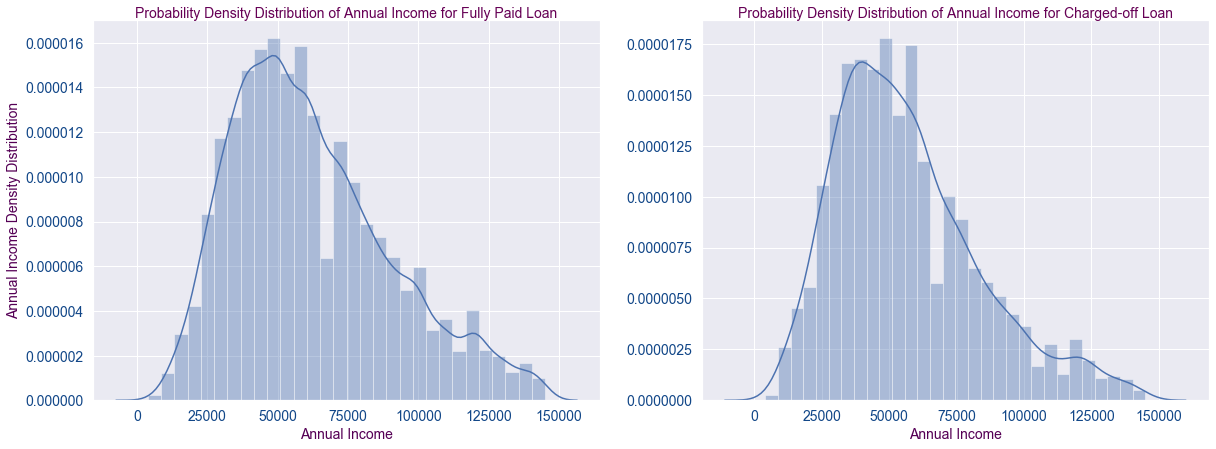

In [182]:
# Let's also plot the density distribution of Annual income for two loan statuses side by side
_ = plt.figure(figsize=(20,7))
_ = plt.subplot(1,2,1)

plot_dist_plot(annl_inc_df.loc[(annl_inc_df['loan_status'] == 0),'annual_inc'],
               plotfigure=False,
               bins=30,
               xlabel='Annual Income',
               ylabel='Annual Income Density Distribution',
               title='Probability Density Distribution of Annual Income for Fully Paid Loan',
               ticksFont_size=14)

_ = plt.subplot(1,2,2)
plot_dist_plot(annl_inc_df.loc[(annl_inc_df['loan_status'] == 1),'annual_inc'],
               plotfigure=False,
               bins=30,
               xlabel='Annual Income',
               title='Probability Density Distribution of Annual Income for Charged-off Loan',
               ticksFont_size=14)



#### Annual Income to loan amount ratio relationship with loan status
- Let's analyse how the annual income and loan amount ratio varies with loan status
- How the income and loan amount ratio is correlated with loan status
- Do the lower ratio more likely to default on loan or vice versa

In [183]:
# Calculate the annual income to loan amount ratio - > aanual income/loan amount
 
annl_inc_df['inc_loan_ratio'] = annl_inc_df['annual_inc'] / annl_inc_df['loan_amnt']
annl_inc_df['inc_loan_ratio']

/Users/ragesh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         4.800000
1        12.000000
2         5.105000
3         4.920000
5         7.200000
           ...    
39711    15.000000
39712    44.000000
39713     2.117647
39714    20.000000
39716     2.933333
Name: inc_loan_ratio, Length: 36815, dtype: float64

In [184]:
# Get the summary statistics of income to loan amount ratio grouped on loan status
# We see that the annual income to loan amount ratio average is lower for charged-off loan than fully paid loan
annl_inc_df.groupby('loan_status')['inc_loan_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,31384.0,8.643864,8.189658,1.204819,4.006322,6.123558,10.000000,135.6
1,5431.0,7.163294,6.736204,1.220000,3.272727,5.000000,8.333333,100.0


In [185]:
# Let's find the correlation between the derived metric of income to loan amount ratio vs loan status
# We see that these are negatively correlated
annl_inc_df[['inc_loan_ratio','loan_status']].corr()

,inc_loan_ratio,loan_status
inc_loan_ratio,1.000000,-0.065558
loan_status,-0.065558,1.000000


Lesser the <b>ANNUAL INCOME</b> higher the likelihood of Loan default, we have also analysed the annual income & loan amount ration and we have observed that as the annual income to loan amount ratio average is lower for charged-off loan than fully paid loan, So we have found that annual income have greater impact with combination of loan amount on the loan default. We suggest Annual income as strong driver variable for identification of risky loan applicants.
Applicants with lesser annual income to loan amount ratio are more likely to not repay the loan.

#### QUANT-6 ->  dti

In [186]:
# let's first check dti in metadata dictionary
# it doesn't have missing values 
# There are 2868 unique values
# Most frequent unique value is 0 and frequency count percent is approx 0.46%
print(metadata_df.loc['dti'][0])
metadata_df.loc['dti']

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


Description                        A ratio calculated using the borrower’s total ...
dtype                                                                        float64
uniques                                                                         2868
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                      0
most_frequent_col_count_percent                                                0.46%
Name: dti, dtype: object

In [187]:
# We observe that the mean and median value is almost similar with bit high Standard Deviation.
loan_df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

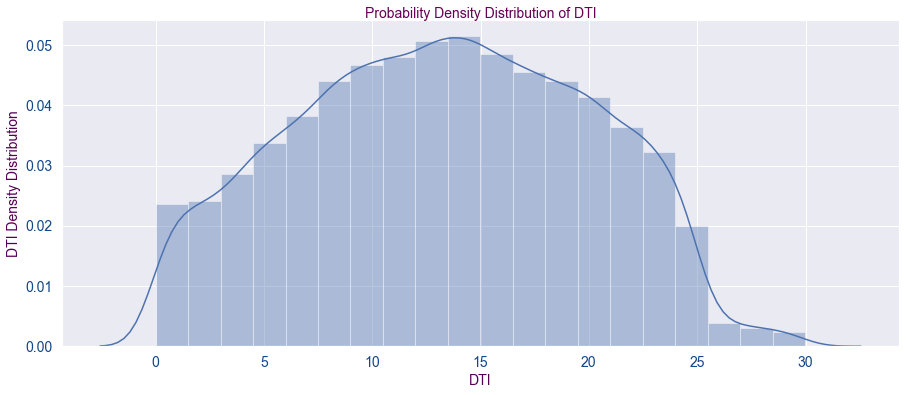

In [188]:
# Plot dti density distribution
# Most of the dti values fall in range of (12 - 17)
plot_dist_plot(loan_df['dti'],
               xlabel='DTI',
               ylabel='DTI Density Distribution',
               bins=20,
               title='Probability Density Distribution of DTI',
               ticksFont_size=14)

In [189]:
# Get the summary statistics for dti w.r.t loan status
# loan_status = 0 (fully paid) & loan_status = 1 (charged_off)
# Charged_off loan average dti is more than the fully paid loan

loan_df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,13.148421,6.680041,0.0,7.98,13.20,18.39,29.99
1,5627.0,14.000624,6.585577,0.0,9.05,14.29,19.29,29.85


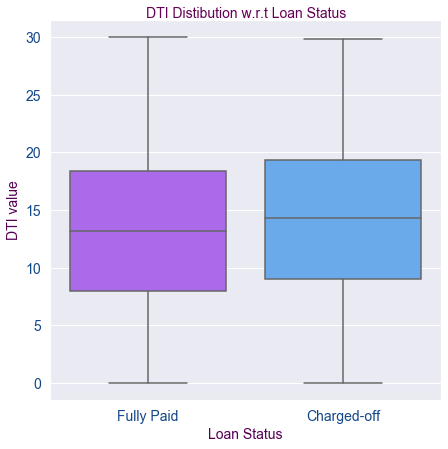

In [190]:
# Plot the summary staistics of dti w.r.t loan status
# Below plot makes it clear that charged-off loan average dti is greater
# So as the dti increase, so is the likelihood of defaulting on loan

plot_box_or_bar_plot(y='dti',
                     x='loan_status',
                     data=loan_df,
                     figsize=(7,7),
                     xlabel='Loan Status',
                     ylabel='DTI value',
                     title = 'DTI Distibution w.r.t Loan Status',
                     labelsFont_size=14,
                     xticks=[[0,1], ['Fully Paid','Charged-off']],
                     ticksFont_size=14)

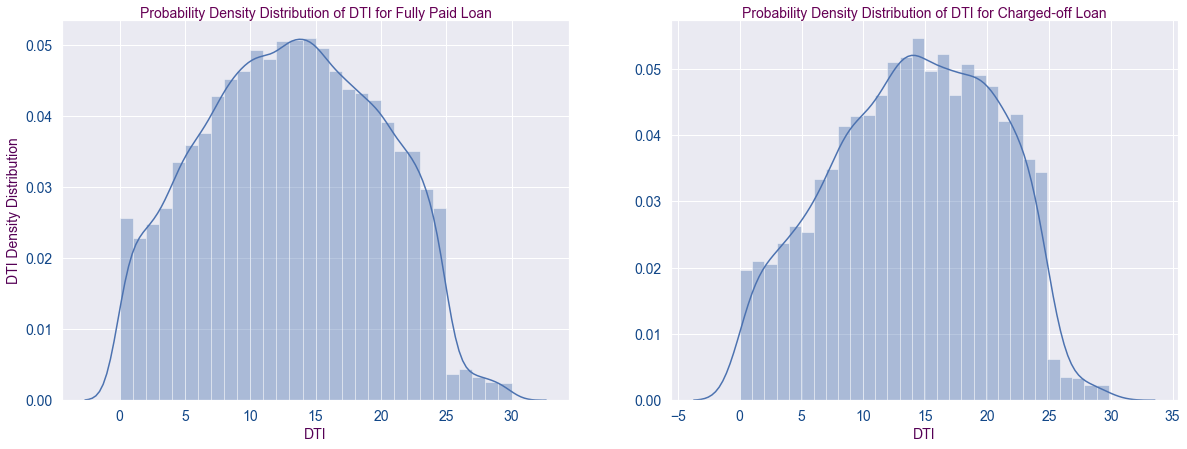

In [191]:
# Let's also plot the density distribution of dti for two loan statuses side by side
_ = plt.figure(figsize=(20,7))
_ = plt.subplot(1,2,1)

plot_dist_plot(loan_df.loc[(loan_df['loan_status'] == 0),'dti'],
               plotfigure=False,
               bins=30,
               xlabel='DTI',
               ylabel='DTI Density Distribution',
               title='Probability Density Distribution of DTI for Fully Paid Loan',
               ticksFont_size=14)

_ = plt.subplot(1,2,2)
plot_dist_plot(loan_df.loc[(loan_df['loan_status'] == 1),'dti'],
               plotfigure=False,
               bins=30,
               xlabel='DTI',
               title='Probability Density Distribution of DTI for Charged-off Loan',
               ticksFont_size=14)



We have found <b>DEBT TO INCOME RATIO</b> average for charged-off loan higher than for the fully paid loan, we found in our analysis dti as stronger driver variable for the charged-off loan. DTI can be used in combination with other driver variables to flag or identify the risky loan applicants.

#### QUANT-7 ->  delinq_2yrs

In [192]:
# let's check delinq_2yrs in metadata dictionary
# it doesn't have missing values 
# There are 11 unique values
# Most frequent unique value 0 frequency count percent is approx 89%
print(metadata_df.loc['delinq_2yrs'][0])
metadata_df.loc['delinq_2yrs']

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


Description                        The number of 30+ days past-due incidences of ...
dtype                                                                          int64
uniques                                                                           11
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                      0
most_frequent_col_count_percent                                               89.14%
Name: delinq_2yrs, dtype: object

In [193]:
# Top 2 values (0 & 1) constitutes almost 98% of the data
# We have high volume of similar values for this variable which dillute the significance of other values
# We couldn't make any concrete conclusion with such a great similarity
get_frequency_distribution(loan_df,'delinq_2yrs')

,delinq_2yrs,normalized_frequency_distribution
0,0,89.14
1,1,8.31
2,2,1.74
3,3,0.55
4,4,0.16
5,5,0.05
6,6,0.03
7,7,0.01
8,8,0.01
9,11,0.00


In [194]:
# Let's drop this
loan_df.drop('delinq_2yrs',1,inplace=True)

<b>We haven't found concrete evidence and facts backed by data to suggest delinq_2yrs as driver variables for loan default.</b>

#### QUANT-8 ->  inq_last_6mths

In [195]:
# let's first check inq_last_6mths in metadata dictionary
# it doesn't have missing values 
# There are 9 unique values
# Most frequent unique value is 0 and it's frequency count percent is approx 48.59%
print(metadata_df.loc['inq_last_6mths'][0])
metadata_df.loc['inq_last_6mths']

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


Description                        The number of inquiries in past 6 months (excl...
dtype                                                                          int64
uniques                                                                            9
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                      0
most_frequent_col_count_percent                                               48.59%
Name: inq_last_6mths, dtype: object

In [196]:
# Get normalized frequency distribution for inq_last_6mths
inq_last_6mths_dist = get_frequency_distribution(loan_df,'inq_last_6mths')

# Top 4 values constitutes approx 99% of total distribution
# for balanced result we should ignore the inq_last_6mths values greater than 3 as their distribution is negligible
inq_last_6mths_dist

,inq_last_6mths,normalized_frequency_distribution
0,0,48.50
1,1,27.63
2,2,14.66
3,3,7.73
4,4,0.82
5,5,0.37
6,6,0.16
7,7,0.09
8,8,0.04


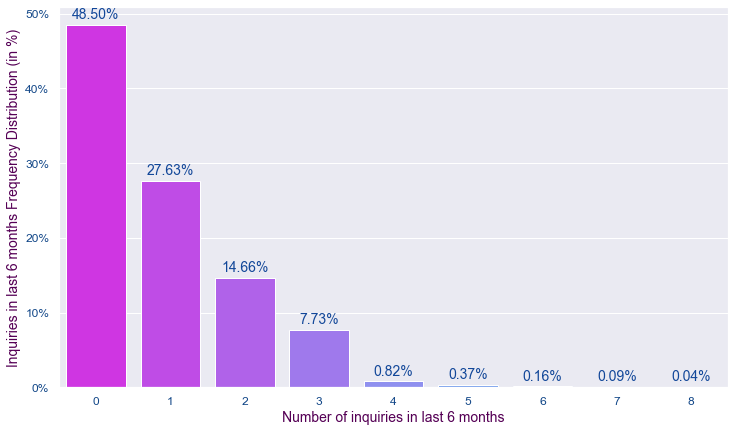

In [197]:
# Plot the normalized frequency distribution of inq_last_6mths variable
# Most of issued loan applicants have the employee length of more than 10 years
plot_box_or_bar_plot(x='inq_last_6mths',
                     y='normalized_frequency_distribution',
                     data=inq_last_6mths_dist,figsize=(12,7),
                     plot=1,
                     xlabel='Number of inquiries in last 6 months',
                     ylabel='Inquiries in last 6 months Frequency Distribution (in %)',
                     yticks=[[0,10,20,30,40,50],['0%','10%','20%','30%','40%','50%']],
                     labelsFont_size=14,
                     ticksFont_size=12,
                     annoteSize=14)

In [198]:
# Get the inq_last_6mths performance w.r.t loan_status ( 0 : fully paid , 1 : charge-off)
# Group loan_df on inq_last_6mths and get the normalized frequency distribution over loan_status
inq_last_6mths_group_dist = get_group_frequency_dist(loan_df.loc[(loan_df['inq_last_6mths'] < 4)], ['inq_last_6mths'], 'loan_status')

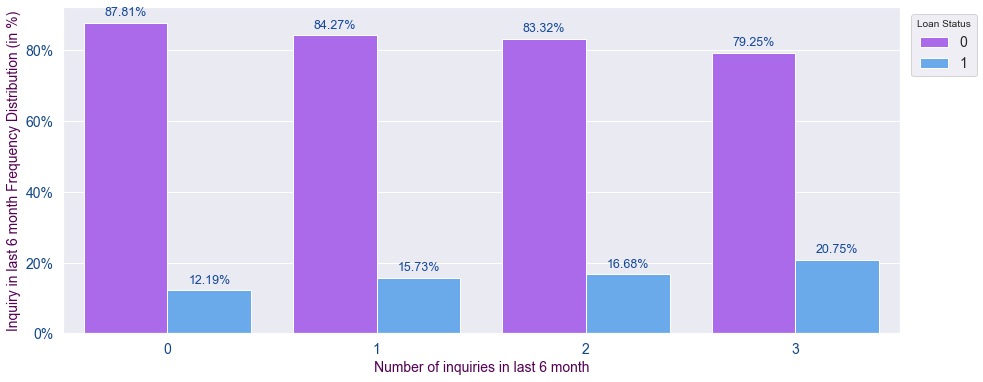

In [199]:
# Plotting the relationship of inq_last_6mths w.r.t loan status (fully paid or charge-off)
# inq_last_6mths doesn't seem to vary much w.r.t loan status for both good loan or loan default
# We observe that as the number of inquiries in last 6 months increase, then chances of loan default also increases

plot_box_or_bar_plot(x='inq_last_6mths', 
                     y='normalized_frequency_distribution',
                     hue='loan_status',
                     data=inq_last_6mths_group_dist,
                     plot=1,
                     figsize=(15,6),
                     annoteSize=12.5,
                     xlabel='Number of inquiries in last 6 month',
                     ylabel='Inquiry in last 6 month Frequency Distribution (in %)',
                     yticks=[[0,20,40,60,80],['0%','20%','40%','60%','80%']],
                     labelsFont_size=14,
                     ticksFont_size=14,
                     have_legend = True,
                     bbox_to_anchor=(1.10,1),
                     legedTitle = 'Loan Status')

Although we can see that as the number of enquiries increase in past 6 months, so is the likeliness for loan default, but <b>'inq_last_6mths'</b> variable is not much useful or appropriate for predicting future loan default or risky applicants as it is very much connected with point of time or continuing loan, in lame term we can say that this variable will come into pictures when the loan has been granted to the applicant, business can use this variable and findings related to it as a precautionary measures for continuing loans, so that they can take appropriate steps on time in case they observe too many enquiries in past 6 months by the applicants. <br>
<b> So we don't suggest 'inq_last_6mths' as driver variable. </b>


#### QUANT-9,10 ->  open_acc, total_acc

In [200]:
# let's first check open_acc in metadata dictionary
# it doesn't have missing values 
# There are 40 unique values
# Most frequent unique value is 7 and it's frequency count percent is approx 10.12%
print(metadata_df.loc['open_acc'][0])
metadata_df.loc['open_acc']

The number of open credit lines in the borrower's credit file.


Description                        The number of open credit lines in the borrowe...
dtype                                                                          int64
uniques                                                                           40
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                      7
most_frequent_col_count_percent                                               10.12%
Name: open_acc, dtype: object

In [201]:
# let's check total_acc in metadata dictionary
# it doesn't have missing values 
# There are 82 unique values
# Most frequent unique value is 16 and it's frequency count percent is approx 3.7%
print(metadata_df.loc['total_acc'][0])
metadata_df.loc['total_acc']

The total number of credit lines currently in the borrower's credit file


Description                        The total number of credit lines currently in ...
dtype                                                                          int64
uniques                                                                           82
missing                                                                            0
all_count                                                                      39717
non_nulls                                                                      39717
missing_percent                                                                    0
is_unique                                                                      False
most_frequent                                                                     16
most_frequent_col_count_percent                                                 3.7%
Name: total_acc, dtype: object

In [202]:
# We observe that their exists outliers, so better to analyse upon <95 percentile
loan_df['open_acc'].describe()

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [203]:
# We observe that their exists outliers, so better to analyse upon <95 percentile
loan_df['total_acc'].describe()

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [204]:
# Analyse the basic statistics of open account column
# We observe that open_acc has outliers on higher side, so we would prefer extracting out only <95 percentile
# Extract out only <95 percentile for open_acc from loan_df
# This will help us to have a look at a better dataset
# So we removed almost 3000 outliers
print(loan_df['open_acc'].describe())
open_acc_df = loan_df[loan_df.open_acc < loan_df.open_acc.quantile(.95)][['loan_status', 'open_acc']]
open_acc_df['open_acc'].describe()

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


count    35950.000000
mean         8.518887
std          3.417212
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         16.000000
Name: open_acc, dtype: float64

In [205]:
# Get normalized frequency distribution for open_acc
open_acc_dist = get_frequency_distribution(open_acc_df,'open_acc')
open_acc_dist

,open_acc,normalized_frequency_distribution
0,7,10.87
1,6,10.70
2,8,10.61
3,9,10.03
4,5,8.65
5,10,8.61
6,11,7.42
7,4,6.40
8,12,6.11
9,13,5.16


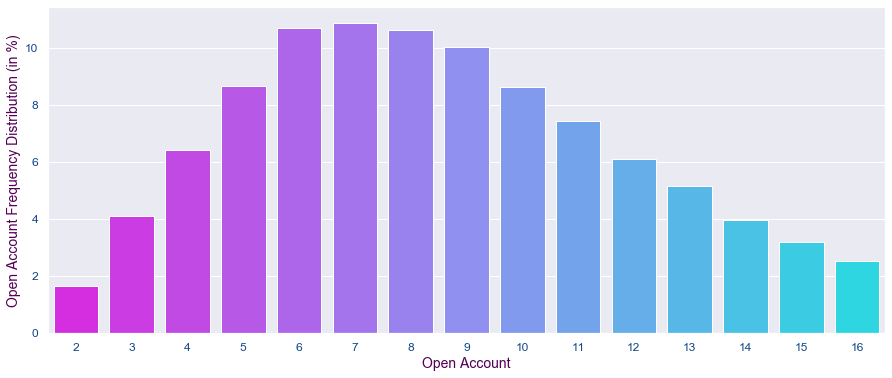

In [206]:
# Plotting open account frequency distribution
# We observe that maximum open accounts are in the range of (6 - 9)

plot_box_or_bar_plot(x='open_acc', y='normalized_frequency_distribution',
                data=open_acc_dist,
                plot=1,
                figsize=(15,6),
                annotate=False,
                xlabel='Open Account',
                ylabel='Open Account Frequency Distribution (in %)')

In [207]:
# Get the normalized frequency distribution of open account around loan status
open_acc_group_freq_dist =  get_group_frequency_dist(open_acc_df,['open_acc'],'loan_status')
open_acc_group_freq_dist

,open_acc,loan_status,normalized_frequency_distribution
0,2,0,78.69
1,2,1,21.31
2,3,0,82.45
3,3,1,17.55
4,4,0,84.17
5,4,1,15.83
6,5,0,86.34
7,5,1,13.66
8,6,0,85.88
9,6,1,14.12


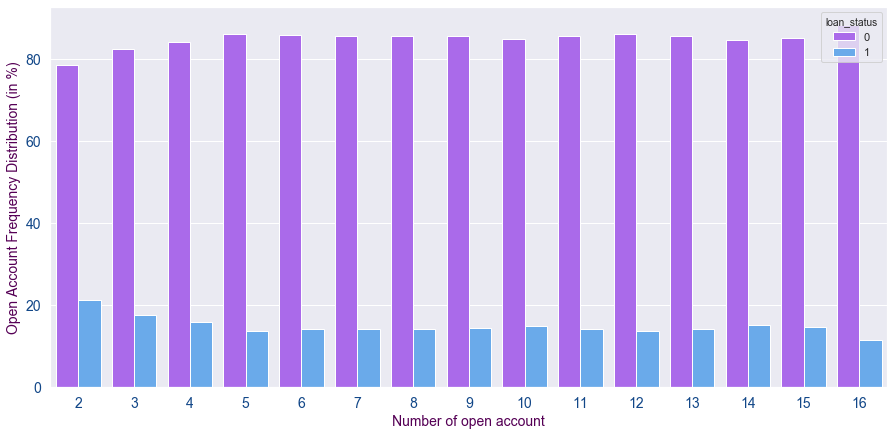

In [208]:
# Plot normalized frequency distribution of number of open account w.r.t loan status
# We don't find an interesting pattern by which we can find out a relation between open_acc impact on loan_status

plot_box_or_bar_plot(x='open_acc', 
                     y='normalized_frequency_distribution',
                     hue='loan_status', 
                     data=open_acc_group_freq_dist,figsize=(15,7),
                     plot=1,
                     xlabel='Number of open account',
                     ylabel='Open Account Frequency Distribution (in %)',
                     labelsFont_size=14,
                     ticksFont_size=14,
                     annotate=False)

In [209]:
# Analyse the basic statistics of total account column
# We observe that total_account has outliers on higher side, so we would prefer extracting out only <95 percentile
# Extract out only <95 percentile for total_acc from loan_df
# This will help us to have a look at a better dataset
# So we removed almost 2000 outliers
print(loan_df['total_acc'].describe())
total_acc_df = loan_df[loan_df.total_acc < loan_df.total_acc.quantile(.95)][['loan_status', 'total_acc']]
total_acc_df['total_acc'].describe()

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


count    36422.000000
mean        20.405524
std          9.341979
min          2.000000
25%         13.000000
50%         20.000000
75%         27.000000
max         42.000000
Name: total_acc, dtype: float64

In [210]:
# Get normalized frequency distribution for total_acc
total_acc_dist = get_frequency_distribution(total_acc_df,'total_acc')
total_acc_dist

,total_acc,normalized_frequency_distribution
0,16,3.91
1,15,3.89
2,17,3.87
3,14,3.85
4,20,3.82
5,18,3.79
6,13,3.75
7,21,3.72
8,19,3.58
9,12,3.54


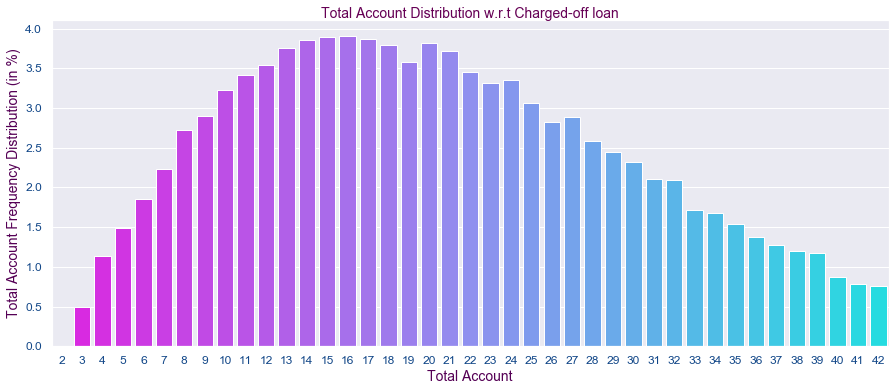

In [211]:
# Plotting total account frequency distribution
# We observe that maximum open accounts are in the range of (13-22)

plot_box_or_bar_plot(x='total_acc', y='normalized_frequency_distribution',
                data=total_acc_dist,
                plot=1,
                figsize=(15,6),
                annotate=False,
                xlabel='Total Account',
                ylabel='Total Account Frequency Distribution (in %)',
                title = 'Total Account Distribution w.r.t Charged-off loan')

In [212]:
# Get the normalized frequency distribution of total account around loan status
total_acc_group_freq_dist =  get_group_frequency_dist(total_acc_df,['total_acc'],'loan_status')
total_acc_group_freq_dist

,total_acc,loan_status,normalized_frequency_distribution
0,2,0,75.00
1,2,1,25.00
2,3,0,76.54
3,3,1,23.46
4,4,0,80.96
...,...,...,...
77,40,1,15.19
78,41,0,84.15
79,41,1,15.85
80,42,0,87.32


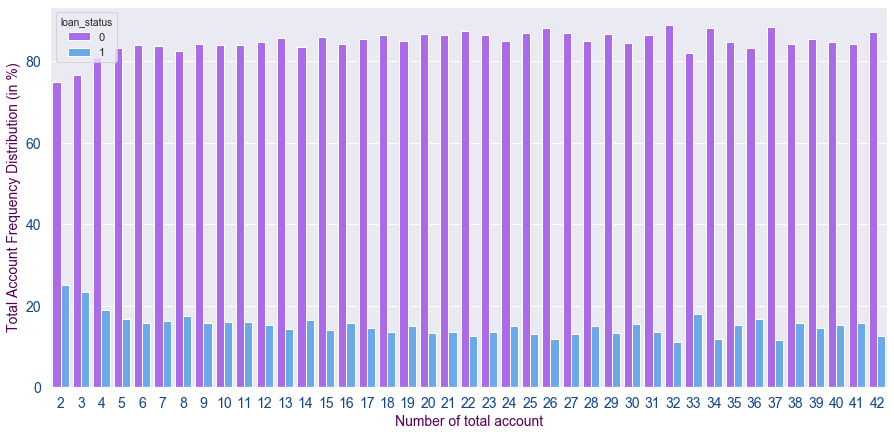

In [213]:
# Plot normalized frequency distribution of number of open account w.r.t loan status
# We don't find an interesting pattern by which we can find out a relation between open_acc impact on loan_status

plot_box_or_bar_plot(x='total_acc', 
                     y='normalized_frequency_distribution',
                     hue='loan_status', 
                     data=total_acc_group_freq_dist,figsize=(15,7),
                     plot=1,
                     xlabel='Number of total account',
                     ylabel='Total Account Frequency Distribution (in %)',
                     labelsFont_size=14,
                     ticksFont_size=14,
                     annotate=False)

In [214]:
# No interesting pattern found to extract out a relationship between number of open/total account with loan status
# So let's drop both these variables
loan_df.drop('open_acc',1, inplace=True)
loan_df.drop('total_acc',1, inplace=True)
loan_df.shape

(38577, 26)

<b> We don't find any pattern or facts to support the significant impact of open_acc, total_acc on loan default,so we don't suggest these as driver variable. </b>

#### QUANT-11, 12 ->  pub_rec, pub_rec_bankruptcies

In [215]:
# let's first check pub_rec in metadata dictionary
# it doesn't have missing values 
# There are 5 unique values
# Most frequent unique value is 0 and frequency count percent is approx 95%
metadata_df.loc['pub_rec']

Description                        Number of derogatory public records
dtype                                                            int64
uniques                                                              5
missing                                                              0
all_count                                                        39717
non_nulls                                                        39717
missing_percent                                                      0
is_unique                                                        False
most_frequent                                                        0
most_frequent_col_count_percent                                 94.67%
Name: pub_rec, dtype: object

In [216]:
# Let's drop pub_rec as it has too high % for similar values
loan_df.drop('pub_rec',1,inplace=True)

In [217]:
# let's check pub_rec_bankruptcies in metadata dictionary
# it doesn't have any missing values 
# there are 3 unique values
# Most of the values are 0, frequency percent is around 94%
metadata_df.loc['pub_rec_bankruptcies']

Description                        Number of public record bankruptcies
dtype                                                           float64
uniques                                                               3
missing                                                             697
all_count                                                         39717
non_nulls                                                         39020
missing_percent                                                     1.8
is_unique                                                         False
most_frequent                                                         0
most_frequent_col_count_percent                                  94.01%
Name: pub_rec_bankruptcies, dtype: object

In [218]:
# Let's drop pub_rec_bankruptcies too as it has too high % for similar values
loan_df.drop('pub_rec_bankruptcies',1,inplace=True)

<b> We don't find any pattern or facts to support the significant impact of pub_rec & pub_rec_bankruptcies on loan default,so we don't suggest these as driver variable. </b>


#### QUANT-13 ->  revol_bal

In [219]:
# let's first check revol_bal in metadata dictionary
# it doesn't have missing values 
# There are 21711 unique values
# Most frequent unique value is 0 and frequency count percent is approx 2.5%
metadata_df.loc['revol_bal']

Description                        Total credit revolving balance
dtype                                                       int64
uniques                                                     21711
missing                                                         0
all_count                                                   39717
non_nulls                                                   39717
missing_percent                                                 0
is_unique                                                   False
most_frequent                                                   0
most_frequent_col_count_percent                              2.5%
Name: revol_bal, dtype: object

In [220]:
# We observe that their exists outliers, so better to analyse upon 5-95 percentile
loan_df['revol_bal'].describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [221]:
# Analyse the basic statistics of revol_bal column
# We observe that revol_bal has outliers on both sides, so we would prefer extracting out only 5-95 percentile
# Extract out only 5-95 percentile for revol_bal from loan_df
# This will help us to have a look at a better dataset
# So we removed almost 4000 outliers
print(loan_df['revol_bal'].describe())
revol_bal_df = loan_df[loan_df.revol_bal.between(loan_df.revol_bal.quantile(0.05),
                                                loan_df.revol_bal.quantile(.95))][['loan_status', 'revol_bal']]
revol_bal_df['revol_bal'].describe()

count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64


count    34721.000000
mean     11106.208347
std       8951.007635
min        312.000000
25%       4103.000000
50%       8761.000000
75%      15789.000000
max      41347.000000
Name: revol_bal, dtype: float64

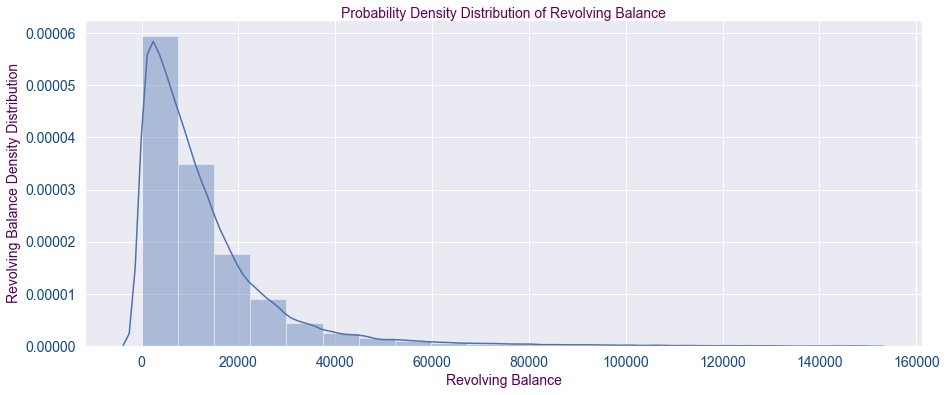

In [222]:
# Plot Revolving Balance density distribution
# Most of the data fall under revolving balance of < 1000
plot_dist_plot(loan_df['revol_bal'],
               xlabel='Revolving Balance',
               ylabel='Revolving Balance Density Distribution',
               bins=20,
               title='Probability Density Distribution of Revolving Balance',
               ticksFont_size=14)

In [223]:
# Get the summary statistics of revol_bal w.r.t loan status
# loan_status = 0 (fully paid) & loan_status = 1 (charged-off)
# There is not much difference in the average revol_bal between fully paid and charged-off loans

revol_bal_df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,29660.0,11037.507283,8932.603756,312.0,4047.0,8686.5,15658.25,41347.0
1,5061.0,11508.831061,9048.521372,312.0,4458.0,9185.0,16333.00,41331.0


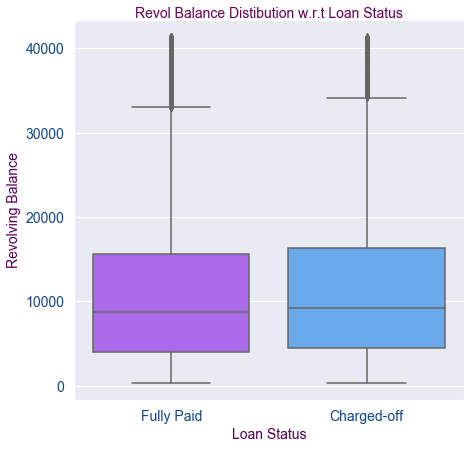

In [224]:
# Plot the summary staistics of revol_bal w.r.t loan status
# Both distribution (based on loan status) have outliers presence
# Average revolving balance is almost similar for fully paid and charged-off loan
plot_box_or_bar_plot(y='revol_bal',
                     x='loan_status',
                     data=revol_bal_df,
                     figsize=(7,7),
                     xlabel='Loan Status',
                     ylabel='Revolving Balance',
                     title = 'Revol Balance Distibution w.r.t Loan Status',
                     labelsFont_size=14,
                     xticks=[[0,1], ['Fully Paid','Charged-off']],
                     ticksFont_size=14)


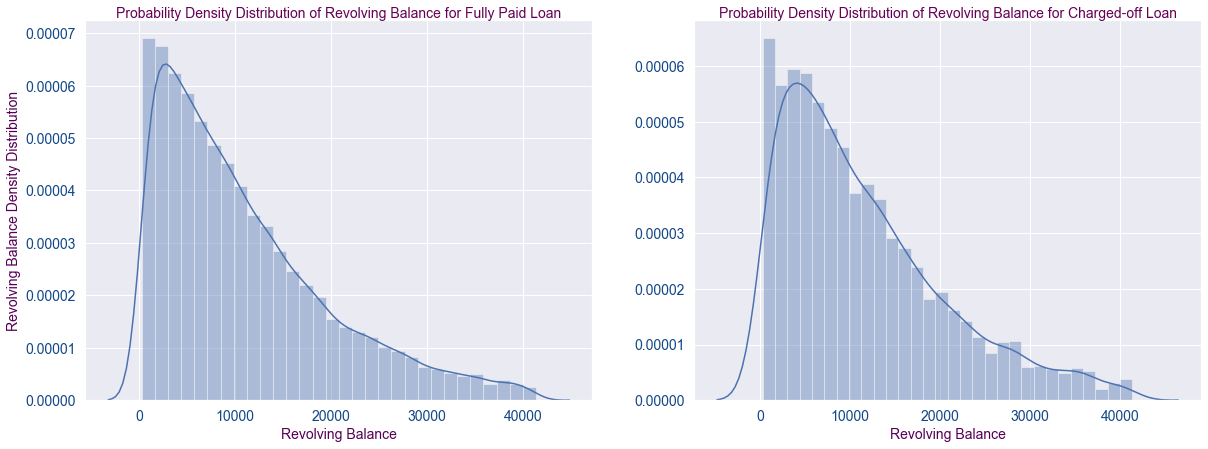

In [225]:
# Let's also plot the density distribution of Revolving Balance for two loan statuses side by side
_ = plt.figure(figsize=(20,7))
_ = plt.subplot(1,2,1)

plot_dist_plot(revol_bal_df.loc[(revol_bal_df['loan_status'] == 0),'revol_bal'],
               plotfigure=False,
               bins=30,
               xlabel='Revolving Balance',
               ylabel='Revolving Balance Density Distribution',
               title='Probability Density Distribution of Revolving Balance for Fully Paid Loan',
               ticksFont_size=14)

_ = plt.subplot(1,2,2)
plot_dist_plot(revol_bal_df.loc[(revol_bal_df['loan_status'] == 1),'revol_bal'],
               plotfigure=False,
               bins=30,
               xlabel='Revolving Balance',
               title='Probability Density Distribution of Revolving Balance for Charged-off Loan',
               ticksFont_size=14)

<b> We don't find any pattern or facts to support the significant impact of revol_bal on loan default,so we don't suggest this as driver variable. </b>

pub_rec, pub_rec_bankruptcies

#### QUANT-14, 15 ->  total_pymnt, total_rec_prncp & total_pymnt_inv

In [226]:
# Get the correlated column for total_pymnt
# All these 3 columns are highly correlated hence we can pick any one of them
total_payment_corr_cols = cor_new.loc['total_pymnt','cor_columns']
total_payment_corr_cols

['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']

<Figure size 1080x504 with 0 Axes>

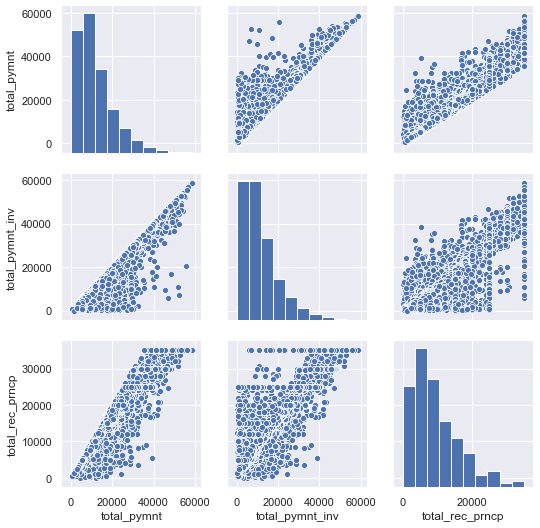

In [227]:
# Let's plot the pairwise plot which will help to verify the correlation and linearity between these 3 correlated variables
# We observe that there is almost perfact linear correlation among these variables as the data is distribute in almost
# similar fashion in all 3 of these variables
_ = plt.figure(figsize=(15,7))
_ = sns.pairplot(loan_df[total_payment_corr_cols])

In [228]:
# Let's find these variables correlation with loan_status
# All of the 3 are negatively correlated
# Correlation is highest for total_rec_prncp with loan_status among the three 
total_payment_corr_cols.append('loan_status')

# Check the correlation 
loan_df[total_payment_corr_cols].corr()

,total_pymnt,total_pymnt_inv,total_rec_prncp,loan_status
total_pymnt,1.000000,0.968580,0.973542,-0.235898
total_pymnt_inv,0.968580,1.000000,0.940299,-0.232906
total_rec_prncp,0.973542,0.940299,1.000000,-0.334944
loan_status,-0.235898,-0.232906,-0.334944,1.000000


In [229]:
# Let's just keep total_rec_prncp and drop other two
loan_df.drop(['total_pymnt','total_pymnt_inv'],1,inplace=True)

In [230]:
# let's first check total_rec_prncp in metadata dictionary
# it doesn't have any missing values 
# there are 7976 unique values
# most frequent value is 10000.6 which constitutes approx 5.77% of total
metadata_df.loc['total_rec_prncp']

Description                        Principal received to date
dtype                                                 float64
uniques                                                  7976
missing                                                     0
all_count                                               39717
non_nulls                                               39717
missing_percent                                             0
is_unique                                               False
most_frequent                                           10000
most_frequent_col_count_percent                         5.77%
Name: total_rec_prncp, dtype: object

In [231]:
loan_df['total_rec_prncp'].describe()

count    38577.000000
mean      9648.322898
std       7009.381200
min          0.000000
25%       4500.000000
50%       8000.000000
75%      13175.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64

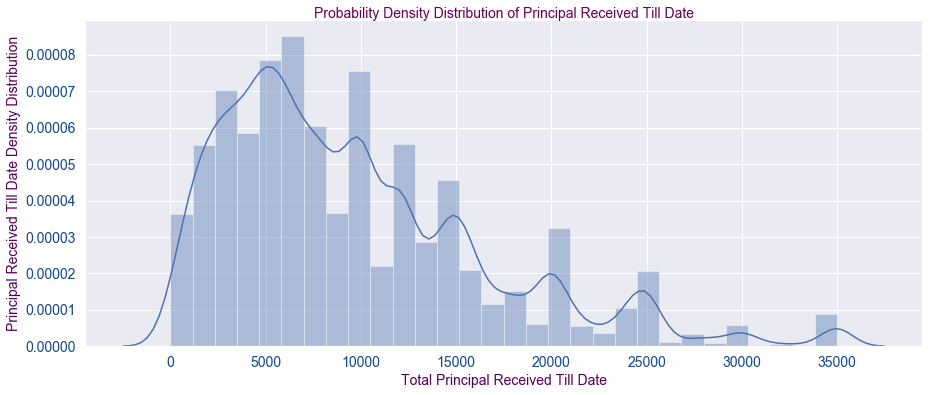

In [232]:
# Plot total_rec_prncp density distribution
# Most of the total_pymnt data fall in range of (5000 - 8,000)
plot_dist_plot(loan_df['total_rec_prncp'],
               xlabel='Total Principal Received Till Date',
               ylabel='Principal Received Till Date Density Distribution',
               bins=30,
               title='Probability Density Distribution of Principal Received Till Date',
               ticksFont_size=14)

In [233]:
# There is huge difference in average of total_rec_prncp between two loan statuses
# Average total_rec_prncp for vcharged-off loan is much lower which is expected 
loan_df.groupby('loan_status')['total_rec_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,10618.514176,6956.042362,500.0,5050.00,9200.00,14500.00,35000.02
1,5627.0,3967.177947,3963.430777,0.0,1205.78,2729.59,5341.13,31115.81


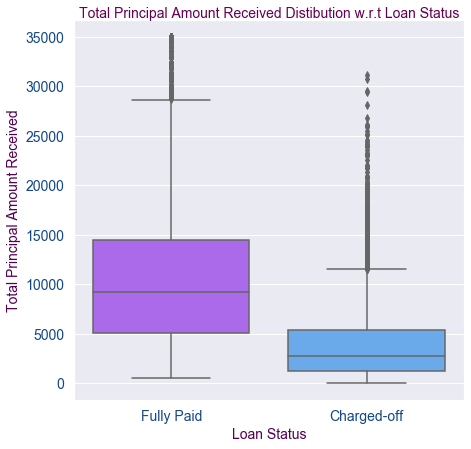

In [234]:
# Let's compare the total_rec_prncp payment summary statistics such as mean, median,max, IQR range, outliers etc for loan status
# From box plot we can clearly observe that the charged off loan or default loan status have very low total_rec_prncp
# From the plot, it is clear that total principal received till date for the charged-off loans tends to be on the lower side than good loans

plot_box_or_bar_plot(y='total_rec_prncp',
                     x='loan_status',
                     data=loan_df,
                     figsize=(7,7),
                     xlabel='Loan Status',
                     ylabel='Total Principal Amount Received',
                     title = 'Total Principal Amount Received Distibution w.r.t Loan Status',
                     labelsFont_size=14,
                     xticks=[[0,1], ['Fully Paid','Charged-off']],
                     ticksFont_size=14)


From our analysis of <b>Principal received to date</b> we can observe that this is lower for charged-off loan but that is obvious, this is not useful for predicting loam defaults as this is more like a qualitative variables which describes nature of loan default or fully paid loan. <br>
<b>So we don't suggest any of the 'total_pymnt, total_rec_prncp & total_pymnt_inv' as driver variable for predicting loan default or indentifying risky applicants </b>

#### QUANT-17, 18 ->  total_rec_int, total_rec_late_fee

In [235]:
# let's first check total_rec_int in metadata dictionary
# it doesn't have any missing values 
# there are 35148 unique values
# The most frequent value 0 have only 0.18% frequency
metadata_df.loc['total_rec_int']

Description                        Interest received to date
dtype                                                float64
uniques                                                35148
missing                                                    0
all_count                                              39717
non_nulls                                              39717
missing_percent                                            0
is_unique                                              False
most_frequent                                              0
most_frequent_col_count_percent                        0.18%
Name: total_rec_int, dtype: object

In [236]:
# Almost all unique, let's drop it
loan_df.drop('total_rec_int',1,inplace=True)

In [237]:
# let's first check total_rec_late_fee in metadata dictionary
# it doesn't have any missing values 
# there are 1356 unique values
# Most frequent value is zero, ~95% count percent of zero
metadata_df.loc['total_rec_late_fee']

Description                        Late fees received to date
dtype                                                 float64
uniques                                                  1356
missing                                                     0
all_count                                               39717
non_nulls                                               39717
missing_percent                                             0
is_unique                                               False
most_frequent                                               0
most_frequent_col_count_percent                        94.85%
Name: total_rec_late_fee, dtype: object

In [238]:
# Almost all same values, so drop this too
loan_df.drop('total_rec_late_fee',1,inplace=True)

<b>We haven't found total_rec_int & total_rec_late_fee as driver varaible for identifying loan default or risky applicants. </b>

#### QUANT-19, 20 ->  recoveries, collection_recovery_fee

In [239]:
# let's first check recoveries in metadata dictionary
# it doesn't have any missing values
# there are 4040 unique values
# most frequent value is 0 which constitutes approx 89% of total
metadata_df.loc['recoveries']

Description                        post charge off gross recovery
dtype                                                     float64
uniques                                                      4040
missing                                                         0
all_count                                                   39717
non_nulls                                                   39717
missing_percent                                                 0
is_unique                                                   False
most_frequent                                                   0
most_frequent_col_count_percent                            89.38%
Name: recoveries, dtype: object

In [240]:
# let's first check collection_recovery_fee in metadata dictionary
# it doesn't have any missing values 
# there are 2616 unique values
# most frequent value is 0 which constitutes approx 90% of total
metadata_df.loc['collection_recovery_fee']

Description                        post charge off collection fee
dtype                                                     float64
uniques                                                      2616
missing                                                         0
all_count                                                   39717
non_nulls                                                   39717
missing_percent                                                 0
is_unique                                                   False
most_frequent                                                   0
most_frequent_col_count_percent                            90.48%
Name: collection_recovery_fee, dtype: object

In [241]:
# Too many similar values in abobe too
# Also it doesn't seems like that above too wll be useful for predicting the loan default
loan_df.drop(['recoveries','collection_recovery_fee'],1,inplace=True)

In [242]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'revol_bal',
       'total_rec_prncp', 'last_pymnt_amnt', 'issue_d_month', 'issue_d_year'],
      dtype='object')

<b>We haven't found any of the recoveries or collection_recovery_fee as driver variables for identifying risky loan applicants.<b>

##### Data analysis summary

- We have found 8 driving variables namely Loan term, sub grade, interest rate, loan purpose, applicants state, loan amount, annual income & dti which have strong factors or relations associated with the Loan default
- These variables are good fit to be used together for the identification of the risky applicants
- business can use these variables metrics in combinations to take calculated descision of accepting or rejecting the loan, decreasing the loan amount or lending at higher interest rate.
- We have our finding backed by the facts, supported by the data and hence we can suggest these variables as strong driver variables for the identification of risky loan applicants.